In [1]:
#Der Stromverbrauch verteilte sich 2023 wie folgt: Industrie: 40,0 %, Private Haushalte: 28,0 %, 
#Kleinverbraucher – hierzu zählen Handel, Gewerbe, Dienstleistungen sowie öffentliche Einrichtungen: 26,7 % und Verkehr: 3,3 %.

#QUELLE : https://www.weltenergierat.de/energie-fuer-deutschland-2024/energie-in-deutschland-zahlen-und-fakten

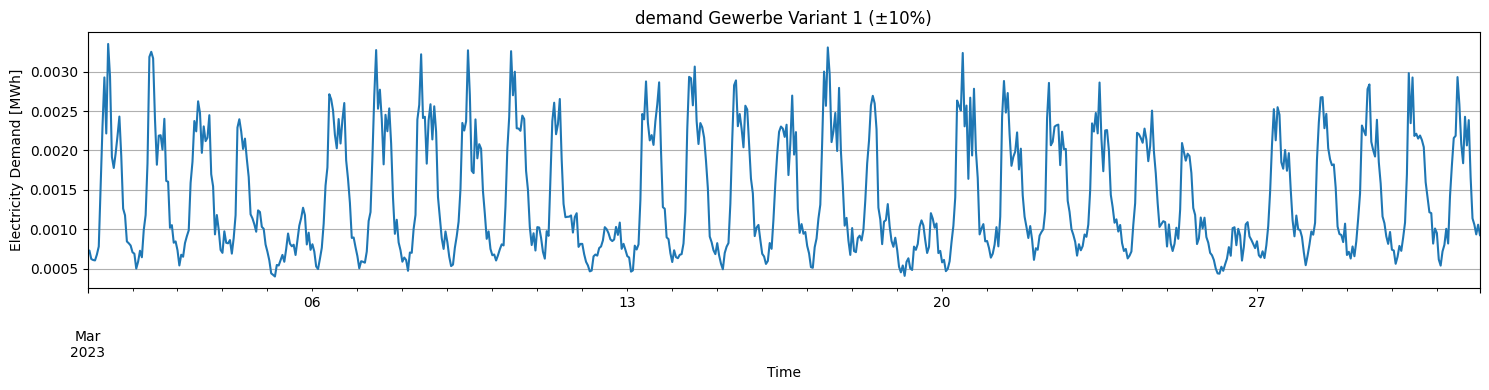

,tot_demand_Gewerbe_variants_[MWh]
2023-03-01 00:00:00,0.008947
2023-03-01 01:00:00,0.007373
2023-03-01 02:00:00,0.006833
2023-03-01 03:00:00,0.007078
2023-03-01 04:00:00,0.008424
...,...
2023-03-31 19:00:00,0.013780
2023-03-31 20:00:00,0.012600
2023-03-31 21:00:00,0.011896
2023-03-31 22:00:00,0.011621


In [2]:
from demandlib.bdew import ElecSlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

e_slp = ElecSlp(year=2023)                     # general business
g0_annual = 12000

profile_g0 = e_slp.get_scaled_profiles({"g0": g0_annual})

demand_Gewerbe = profile_g0["g0"].resample("1h").sum()
demand_Gewerbe = demand_Gewerbe["2023-03-01":"2023-03-31"] / 1000
demand_Gewerbe= demand_Gewerbe.to_frame(name="Demand [MWh]")
#display(demand_Gewerbe.sum())

np.random.seed(42)

#  Generate 12 varied profiles
gewerbe_variants_profiles = []

for i in range(12):
    variation = np.random.uniform(0.8, 1.2, size=len(demand_Gewerbe))
    modified_values = demand_Gewerbe["Demand [MWh]"].values * variation
    
    df_variant = pd.DataFrame(modified_values, index=demand_Gewerbe.index, columns=[f"demand_Gewerbe_{i+1}_[MWh]"])
    
    gewerbe_variants_profiles.append(df_variant)

all_gewerbe_variants = pd.concat(gewerbe_variants_profiles, axis=1)

all_gewerbe_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Gewerbe Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Gewerbe = all_gewerbe_variants.sum(axis=1).to_frame(name="tot_demand_Gewerbe_variants_[MWh]")
display(tot_Gewerbe)
#all_gewerbe_variants.head(5)

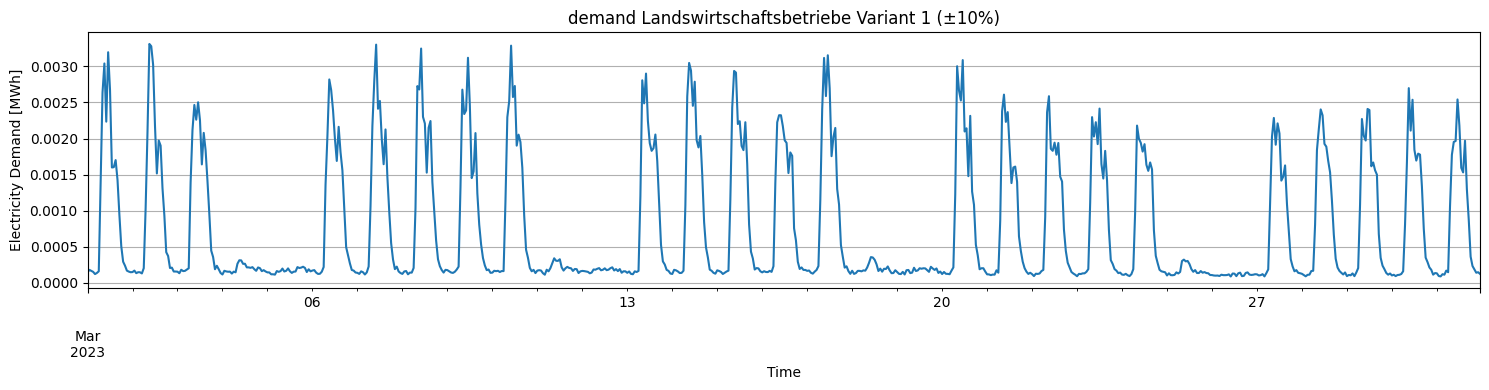

,tot_demand_Landswirtschaftsbetriebe_variants_[MWh]
2023-03-01 00:00:00,0.001588
2023-03-01 01:00:00,0.001561
2023-03-01 02:00:00,0.001568
2023-03-01 03:00:00,0.001444
2023-03-01 04:00:00,0.001425
...,...
2023-03-31 19:00:00,0.002345
2023-03-31 20:00:00,0.001904
2023-03-31 21:00:00,0.001500
2023-03-31 22:00:00,0.001370


In [3]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)            # Business on weekdays 8 a.m. - 6 p.m.
g1_annual = 6000

profile_g1 = e_slp.get_scaled_profiles({"g1": g1_annual})

demand_Landswirtschaftsbetriebe = profile_g1["g1"].resample("1h").sum()
demand_Landswirtschaftsbetriebe = demand_Landswirtschaftsbetriebe["2023-03-01":"2023-03-31"] / 1000
demand_Landswirtschaftsbetriebe = demand_Landswirtschaftsbetriebe.to_frame(name="Demand [MWh]")
#demand_Landswirtschaftsbetriebe


np.random.seed(42)

#  Generate 12 varied profiles
Landswirtschaftsbetriebe_variants_profiles = []

for i in range(10):
    variation2 = np.random.uniform(0.8, 1.2, size=len(demand_Landswirtschaftsbetriebe))
    modified_values2 = demand_Landswirtschaftsbetriebe["Demand [MWh]"].values * variation2
    
    df_variant2 = pd.DataFrame(modified_values2, index=demand_Landswirtschaftsbetriebe.index, columns=[f"demand_Landswirtschaftsbetriebe_{i+1}_[MWh]"])
    
    Landswirtschaftsbetriebe_variants_profiles.append(df_variant2)

all_Landswirtschaftsbetriebe_variants = pd.concat(Landswirtschaftsbetriebe_variants_profiles, axis=1)

all_Landswirtschaftsbetriebe_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Landswirtschaftsbetriebe Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Landswirtschaftsbetriebe = all_Landswirtschaftsbetriebe_variants.sum(axis=1).to_frame(name="tot_demand_Landswirtschaftsbetriebe_variants_[MWh]")
display(tot_Landswirtschaftsbetriebe)
#all_Landswirtschaftsbetriebe_variants.head(5)

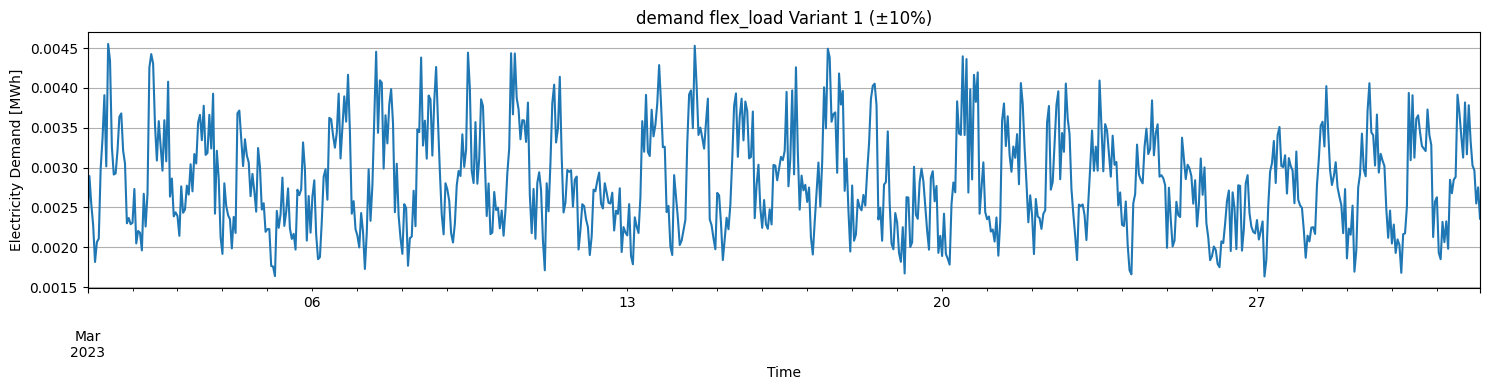

,tot_demand_flex_load_variants_[MWh]
2023-03-01 00:00:00,0.033352
2023-03-01 01:00:00,0.034229
2023-03-01 02:00:00,0.032353
2023-03-01 03:00:00,0.030626
2023-03-01 04:00:00,0.029558
...,...
2023-03-31 19:00:00,0.042981
2023-03-31 20:00:00,0.041250
2023-03-31 21:00:00,0.038039
2023-03-31 22:00:00,0.035602


In [4]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
g3_annual = 25000
profile_g3 = e_slp.get_scaled_profiles({"g3": g3_annual})   #Continuous business

demand_flex_load = profile_g3["g3"].resample("1h").sum()
demand_flex_load = demand_flex_load["2023-03-01":"2023-03-31"] / 1000
demand_flex_load = demand_flex_load.to_frame(name="Demand [MWh]")
#demand_flex_load

np.random.seed(42)

#  Generate 12 varied profiles
flex_load_variants_profiles = []

for i in range(14):
    variation3 = np.random.uniform(0.8, 1.2, size=len(demand_flex_load))
    modified_values3 = demand_flex_load["Demand [MWh]"].values * variation3
    
    df_variant3 = pd.DataFrame(modified_values3, index=demand_flex_load.index, columns=[f"demand_flex_load_{i+1}_[MWh]"])
    
    flex_load_variants_profiles.append(df_variant3)

all_flex_load_variants = pd.concat(flex_load_variants_profiles, axis=1)

all_flex_load_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand flex_load Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_flex_load = all_flex_load_variants.sum(axis=1).to_frame(name="tot_demand_flex_load_variants_[MWh]")
display(tot_flex_load)
#all_flex_load_variants.head(5)

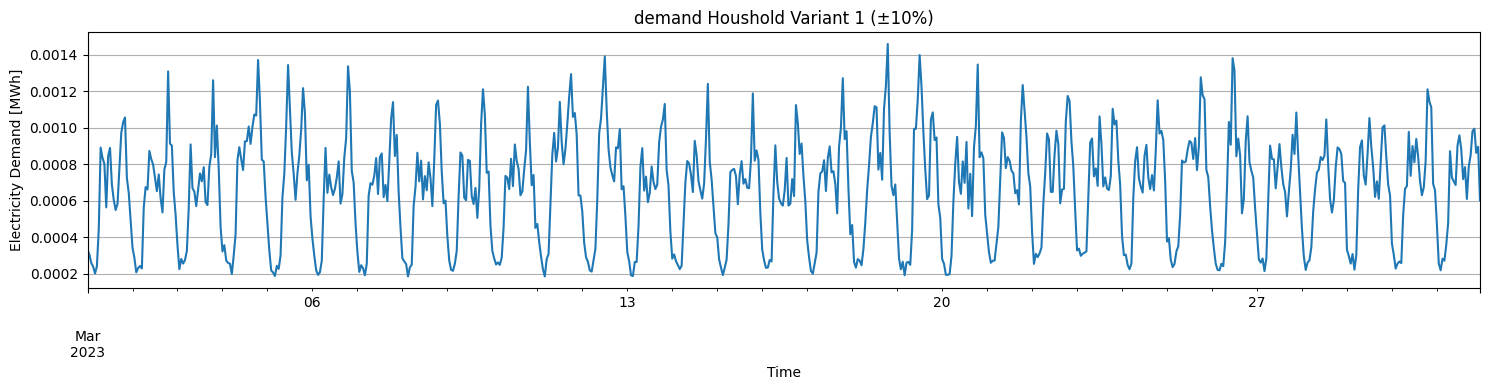

,tot_demand_Houshold_variants_[MWh]
2023-03-01 00:00:00,0.008843
2023-03-01 01:00:00,0.006443
2023-03-01 02:00:00,0.005966
2023-03-01 03:00:00,0.005805
2023-03-01 04:00:00,0.005831
...,...
2023-03-31 19:00:00,0.025631
2023-03-31 20:00:00,0.024456
2023-03-31 21:00:00,0.023249
2023-03-31 22:00:00,0.020712


In [5]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
h0_annual = 6000
# gets 15-min energy values, summing to annual total
profile_h0 = e_slp.get_scaled_profiles({"h0": h0_annual})
# rename and convert by hour
demand_Houshold = profile_h0["h0"].resample("1h").sum()
demand_Houshold = demand_Houshold["2023-03-01":"2023-03-31"] / 1000
demand_Houshold = demand_Houshold.to_frame(name="Demand [MWh]")
#demand_Houshold

np.random.seed(42)

#  Generate 12 varied profiles
Houshold_variants_profiles = []

for i in range(25):
    variation4 = np.random.uniform(0.8, 1.2, size=len(demand_Houshold))
    modified_values4 = demand_Houshold["Demand [MWh]"].values * variation4
    
    df_variant4 = pd.DataFrame(modified_values4, index=demand_Houshold.index, columns=[f"demand_Houshold_{i+1}_[MWh]"])
    
    Houshold_variants_profiles.append(df_variant4)

all_Houshold_variants = pd.concat(Houshold_variants_profiles, axis=1)

all_Houshold_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Houshold Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Houshold = all_Houshold_variants.sum(axis=1).to_frame(name="tot_demand_Houshold_variants_[MWh]")
display(tot_Houshold)
#all_Houshold_variants.head(5)


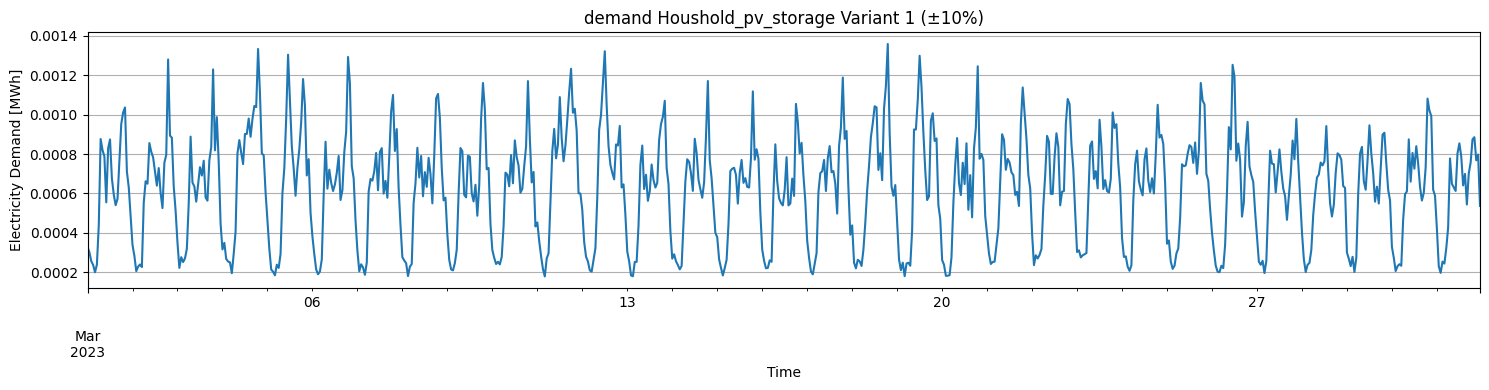

,tot_demand_Houshold_pv_storage_variants_[MWh]
2023-03-01 00:00:00,0.006949
2023-03-01 01:00:00,0.005094
2023-03-01 02:00:00,0.004668
2023-03-01 03:00:00,0.004521
2023-03-01 04:00:00,0.004555
...,...
2023-03-31 19:00:00,0.017808
2023-03-31 20:00:00,0.017515
2023-03-31 21:00:00,0.016515
2023-03-31 22:00:00,0.014665


In [6]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
h0_dyn_annual = 5000
# gets 15-min energy values, summing to annual total
profile_h0_dyn = e_slp.get_scaled_profiles({"h0_dyn": h0_dyn_annual})
# rename and convert by hour
demand_Houshold_pv_storage = profile_h0_dyn["h0_dyn"].resample("1h").sum()
demand_Houshold_pv_storage = demand_Houshold_pv_storage["2023-03-01":"2023-03-31"] / 1000
demand_Houshold_pv_storage = demand_Houshold_pv_storage.to_frame(name="Demand [MWh]")
#demand_Houshold_pv_storage

np.random.seed(42)

#  Generate 12 varied profiles
Houshold_pv_storage_variants_profiles = []

for i in range(20):
    variation5 = np.random.uniform(0.8, 1.2, size=len(demand_Houshold_pv_storage))
    modified_values5 = demand_Houshold_pv_storage["Demand [MWh]"].values * variation5
    
    df_variant5 = pd.DataFrame(modified_values5, index=demand_Houshold_pv_storage.index, columns=[f"demand_Houshold_pv_storage_{i+1}_[MWh]"])
    
    Houshold_pv_storage_variants_profiles.append(df_variant5)

all_Houshold_pv_storage_variants = pd.concat(Houshold_pv_storage_variants_profiles, axis=1)

all_Houshold_pv_storage_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Houshold_pv_storage Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Houshold_pv_storage = all_Houshold_pv_storage_variants.sum(axis=1).to_frame(name="tot_demand_Houshold_pv_storage_variants_[MWh]")
display(tot_Houshold_pv_storage)

#all_Houshold_pv_storage_variants.head(5)

# total demands

In [7]:
tot_demand = tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"] + tot_Houshold["tot_demand_Houshold_variants_[MWh]"] + tot_flex_load["tot_demand_flex_load_variants_[MWh]"] + tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"]+ tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"]
tot_demand = tot_demand.to_frame(name="Demand [MWh]")
tot_demand

,Demand [MWh]
2023-03-01 00:00:00,0.059680
2023-03-01 01:00:00,0.054700
2023-03-01 02:00:00,0.051388
2023-03-01 03:00:00,0.049474
2023-03-01 04:00:00,0.049793
...,...
2023-03-31 19:00:00,0.102545
2023-03-31 20:00:00,0.097726
2023-03-31 21:00:00,0.091198
2023-03-31 22:00:00,0.083970


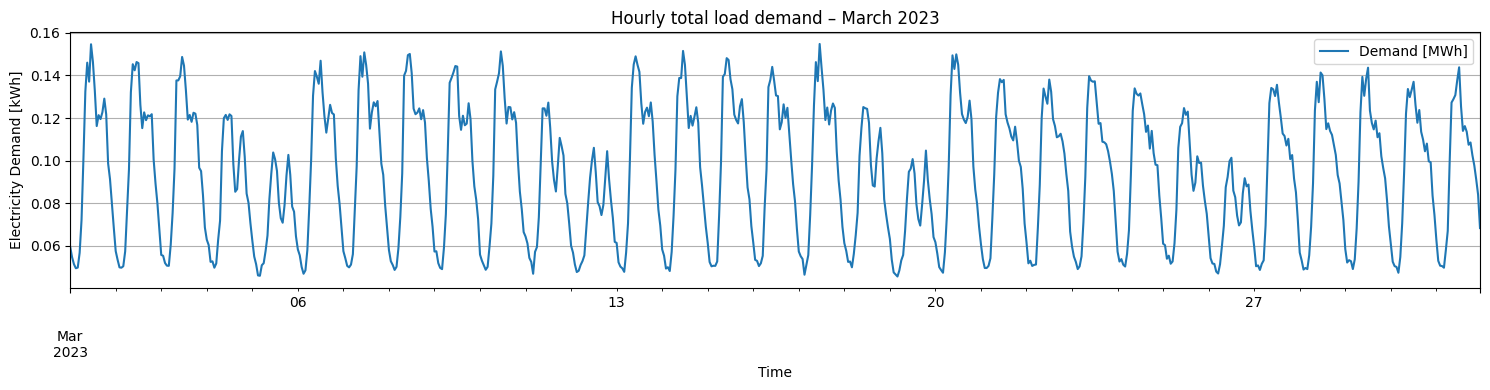

In [8]:
plt.figure(figsize=(15, 4))
tot_demand["Demand [MWh]"].plot(legend=True)
plt.title("Hourly total load demand – March 2023")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
import pypsa
import pandas as pd

net = pypsa.Network()

net.set_snapshots(pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h"))

# Buses

In [10]:
# Grid bus and generator
net.add("Bus", "grid")
net.add("Bus","solar_bus")
net.add("Bus","demand_Gewerbe")
net.add("Bus","houshold")
net.add("Bus","houshold_pv_storage")
net.add("Bus","Landswirtschaftsbetriebe")
net.add("Bus", "battery_bus")
net.add("Bus","flex_load")
net.add("Bus","Biomass")


Index(['Biomass'], dtype='object')

In [11]:
solar_gen = pd.read_csv("solar_simulated_march_2023.csv", header=None, names=["power[W]"])
solar_gen = solar_gen / 1000000
solar_gen.index = net.snapshots
solar_gen.head(20)


,power[W]
snapshot,
2023-03-01 00:00:00,0.000000
2023-03-01 01:00:00,0.000000
2023-03-01 02:00:00,0.000000
2023-03-01 03:00:00,0.000000
2023-03-01 04:00:00,0.000000
2023-03-01 05:00:00,0.000000
2023-03-01 06:00:00,0.000000
2023-03-01 07:00:00,0.102680
2023-03-01 08:00:00,0.199752


In [12]:
tot_Houshold_pv_storage.index = net.snapshots
tot_Houshold.index = net.snapshots
tot_flex_load.index = net.snapshots
tot_Landswirtschaftsbetriebe.index = net.snapshots
tot_Gewerbe.index = net.snapshots
tot_demand.index = net.snapshots

# Electricity price

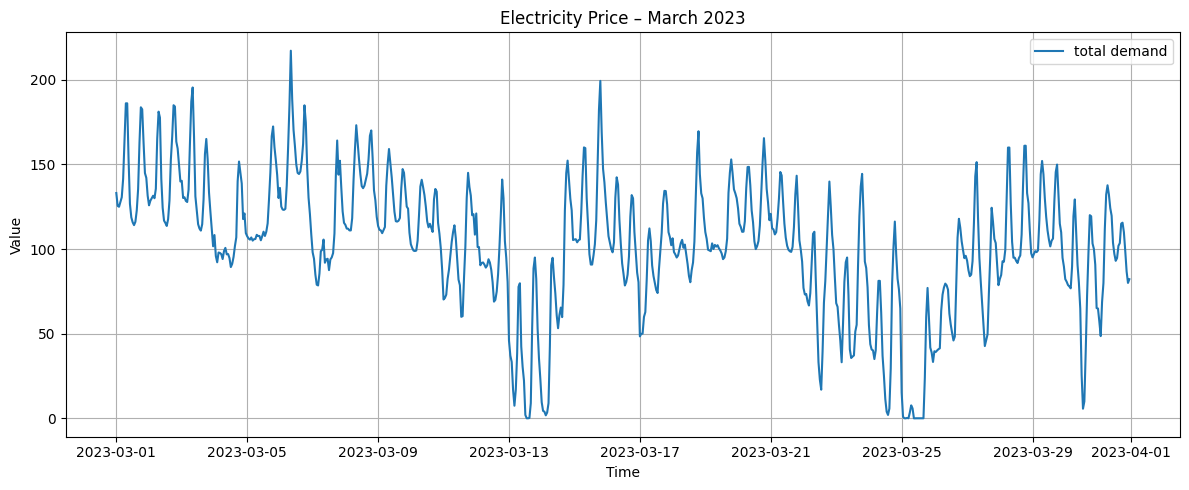

E_price    0.06
dtype: float64

In [13]:
Tou_price = pd.read_csv("electricity_price_march_2023.csv", header=None, names=["E_price"])
tou_Price = Tou_price[::8].copy()

tou_Price.loc[len(tou_Price)] = 82.19
tou_price = tou_Price.reset_index(drop=True)

tou_price.index = net.snapshots
tou_price.loc[tou_price["E_price"] <= 0, "E_price"] = 0.1

plt.figure(figsize=(12, 5))
plt.plot(tou_price,  label="total demand")
plt.title("Electricity Price – March 2023")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#tou_price.max()
tou_price.min()

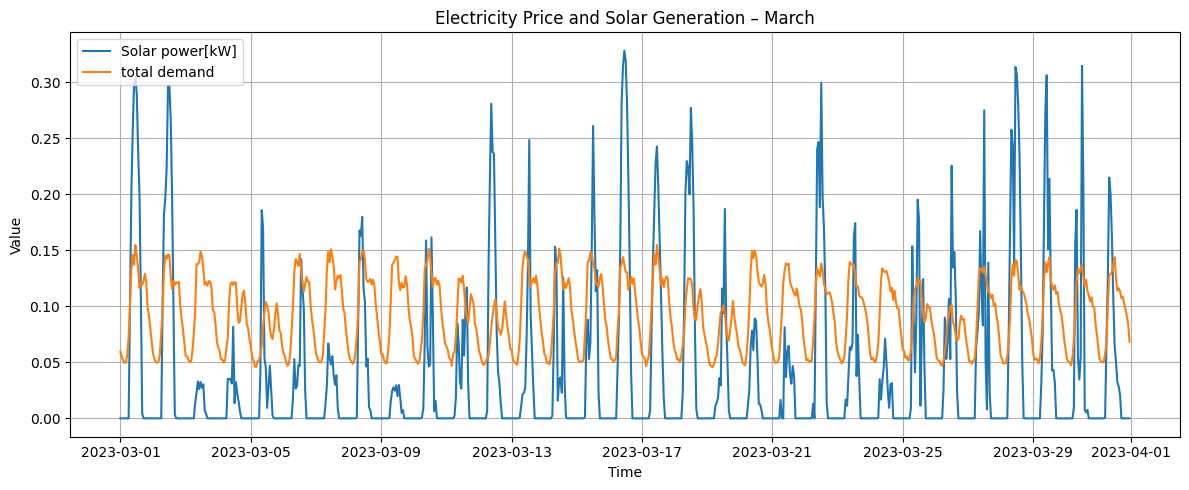

In [14]:
plt.figure(figsize=(12, 5))
plt.plot( solar_gen["power[W]"], label="Solar power[kW]")
plt.plot(tot_demand["Demand [MWh]"],  label="total demand")

plt.title("Electricity Price and Solar Generation – March")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
df_diff = tot_demand["Demand [MWh]"]-  solar_gen["power[W]"]
display(df_diff.max())
display(df_diff.min())

0.12912038153346622

-0.2004251148794797

# All generators

In [16]:
net.add("Generator", "grid_generator",
        bus="grid", p_nom=1e6,
        marginal_cost=tou_price["E_price"])
        

net.add("Generator", "solar",
        bus="solar_bus",
        p_nom=1,
        p_max_pu= solar_gen["power[W]"],
        marginal_cost= 104.5)   #*tou_price["E_price"])

net.add("Generator", "Biomass",    # source: https://www.drax.com/opinion/the-role-of-biomass-in-securing-reliable-power-generation/#:~:text=globally
         bus="Biomass", p_nom=0.06,   # find a source how much percent should be based load covering
         marginal_cost= 104.8)  #*tou_price["E_price"],  # source : zotero: biomass price


Index(['Biomass'], dtype='object')

# Loads (g0,g1,H0...)

In [17]:
net.add("Load","demand_Gewerbe",
        bus="demand_Gewerbe",
        p_set=tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"])

net.add("Load","demand_houshold",
        bus="houshold",
        p_set=tot_Houshold["tot_demand_Houshold_variants_[MWh]"])

net.add("Load","demand_houshold_pv_storage",
        bus="houshold_pv_storage",
        p_set=tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"])

net.add("Load","demand_Landswirtschaftsbetriebe",
        bus="Landswirtschaftsbetriebe",
        p_set=tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"])

net.add("Load","demand_flex_load",
        bus="flex_load",
        p_set=tot_flex_load["tot_demand_flex_load_variants_[MWh]"])

Index(['demand_flex_load'], dtype='object')

# Battery Energy Storage System

In [18]:
net.add("Store", "battery_storage",
        bus="battery_bus",
        e_nom=0.20,           
        e_initial=0,       
        e_cyclic=True)

Index(['battery_storage'], dtype='object')

# Links from GRID to LOADS

In [19]:

net.add("Link", "to_gewerbe",bus0="grid", bus1="demand_Gewerbe",p_nom=10, marginal_cost=216)
net.add("Link", "to_houshold",bus0="grid", bus1="houshold",p_nom=10, marginal_cost=216)
net.add("Link", "to_houshold_pv_storage",bus0="grid", bus1="houshold_pv_storage",p_nom=10,marginal_cost=216)
net.add("Link", "to_Landswirtschaftsbetriebe",bus0="grid", bus1="Landswirtschaftsbetriebe",p_nom=10,marginal_cost=216)
net.add("Link", "to_flex_load",bus0="grid", bus1="flex_load",p_nom=10, marginal_cost=216)

Index(['to_flex_load'], dtype='object')

# Links from SOLAR to LOADS

In [20]:

net.add("Link", "solar_to_gewerbe", bus0="solar_bus", bus1="demand_Gewerbe", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_houshold", bus0="solar_bus", bus1="houshold", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_pvhouse", bus0="solar_bus", bus1="houshold_pv_storage", p_nom=0.4,marginal_cost=100)
net.add("Link", "solar_to_landwirtschaft", bus0="solar_bus", bus1="Landswirtschaftsbetriebe", p_nom=0.4,marginal_cost=100)
net.add("Link", "solar_to_flex_load", bus0="solar_bus", bus1="flex_load", p_nom=0.4,marginal_cost=100)

Index(['solar_to_flex_load'], dtype='object')

# Links from BIOMASS to the LOADS

In [21]:
net.add("Link", "Biomass_to_gewerbe", bus0="Biomass", bus1="demand_Gewerbe", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_houshold", bus0="Biomass", bus1="houshold", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_pvhouse", bus0="Biomass", bus1="houshold_pv_storage", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_landwirtschaft", bus0="Biomass", bus1="Landswirtschaftsbetriebe", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_flex_load", bus0="Biomass", bus1="flex_load", p_nom=0.06,marginal_cost=100)

Index(['Biomass_to_flex_load'], dtype='object')

# Links from Solar to BESS, BESS to the LOADS

In [22]:
net.add("Link", "battery_charge",bus0="solar_bus", bus1="battery_bus", p_nom=0.1, efficiency=1, marginal_cost=0.01, committable=False)

net.add("Link", "BESS_to_gewerbe", bus0="battery_bus", bus1="demand_Gewerbe", p_nom=0.1, marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_houshold", bus0="battery_bus", bus1="houshold", p_nom=0.1 , marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_pvhouse", bus0="battery_bus", bus1="houshold_pv_storage", p_nom=0.1 , marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_landwirtschaft", bus0="battery_bus", bus1="Landswirtschaftsbetriebe", p_nom=0.1 , marginal_cost=100.03, committable=False)
net.add("Link", "BESS_to_flex_load", bus0="battery_bus", bus1="flex_load", p_nom=0.1 , marginal_cost=100.03 , committable=False)

Index(['BESS_to_flex_load'], dtype='object')

In [23]:
#df_EVs = pd.read_csv("charging_plan_generated_by _python.csv", index_col=0, parse_dates=True)
#df_EVs.index = net.snapshots
#df_EVs

# tesla model 3 RWD 2022 : Battery capacity = 62 kwh         14.4 kwh / 100 km
# vw id3 pro :  Battery capacity = 58 kWh         15.6 kwh / 100 km
# vw id7 :  Battery capacity = 77 kW·h       14.1 kwh / 100 km
# BMW i4 M50 :   Bttery capacity =  83.9 kwh   22.5 kwh/ 100 km
# Benz EQE 300 :   Bttery capacity = 89 kwh   16.4 kwh/ 100 km


# EVs buses

In [24]:
charging_profiles = pd.read_csv("charging_profiles.csv", index_col=0, parse_dates=True)
driving_profiles = pd.read_csv("driving_profiles_2.csv", index_col=0, parse_dates=True)
availability_profiles = pd.read_csv("availability_profiles_3.csv", index_col=0, parse_dates=True)
battery_df = pd.read_csv("battery_df.csv", index_col=0)

assert (charging_profiles.index == driving_profiles.index).all()
assert (charging_profiles.index == availability_profiles.index).all()
assert set(charging_profiles.columns) <= set(battery_df.index)


net.set_snapshots(charging_profiles.index)

#net.links_t.p_max_pu = pd.DataFrame(index=charging_profiles.index)
net.links_t.p_max_pu = pd.DataFrame(1.0, index=charging_profiles.index, columns=[])

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    
    ev_bus = f"{ev_id}_bus"
    link_name = f"{ev_id}_charge"
    Link_name = f"{ev_id}_Charge"
    LInk_name = f"{ev_id}_CHarge"
    load_name = f"{ev_id}_load"
    store_name = f"{ev_id}_store"

    V2G_name = f"{ev_id}_discharge"

    availability = availability_profiles[ev_name]

    

    net.add("Bus", ev_bus)

    net.add("Store", store_name,
            bus=ev_bus,
            e_nom = battery_df.loc[ev_name, "e_nom_MWh"],
            e_initial = battery_df.loc[ev_name, "e_initial_MWh"],
            e_cyclic=False,
            marginal_cost=0)

    net.add("Link", link_name,
            bus0="grid",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=216,
            committable=False)
    
    net.add("Link", Link_name,
            bus0="solar_bus",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=100,
            committable=False)

    net.add("Link", LInk_name,
            bus0="battery_bus",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=100,
            committable=False)

    net.add("Load", load_name,
            bus=ev_bus,
            p_set=driving_profiles[ev_name])
    
    net.links_t.p_max_pu[Link_name] = availability
    net.links_t.p_max_pu[link_name] = availability
    net.links_t.p_max_pu[LInk_name] = availability

    net.add("Link", V2G_name,
            bus0=ev_bus,   
            bus1="solar_bus",   
            p_nom=0.011,      
            marginal_cost= -70,
            committable=False)
    
    net.links_t.p_max_pu[V2G_name] = availability


In [25]:

'''ev_power = 13 / 1000
initial_energy = 25 / 1000
roundtrip_eff = 0.95



for i in range(20):
    ev_name = f"EV{i+1}"                                                                                                           
    ev_bus = f"ev{i+1}_bus"
    
    profile_index = (i % 5) + 1
    consumption_col = f"power_consumption{profile_index}_kW"
    availability_col = f"availability{profile_index}"
    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"

    consumption_series = df_EVs[consumption_col]
    availability_series = df_EVs[availability_col]
    Battery_capacity_series = df_EVs[Battery_capacity_col]

    net.add("Bus", ev_bus)
    battery_capacity = Battery_capacity_series.iloc[0] / 1000
    net.add("Store", f"{ev_name}_store",
            bus=ev_bus,
            e_nom= battery_capacity,
            e_initial=initial_energy,
            marginal_cost=0,
            e_cyclic=False)

    net.add("Link", f"{ev_name}_charge",
            bus0="grid", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)
    
    net.add("Link", f"{ev_name}_Charge",
            bus0="solar_bus", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)

    net.add("Link", f"{ev_name}_CHarge",
            bus0="Biomass", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)
    
    net.add("Link", f"{ev_name}_discharge",
            bus0=ev_bus, bus1="grid",
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=-0.12*tou_price["E_price"],  #-132 should be based on a Paper
            committable=True)

    net.add("Load", f"{ev_name}_load",
            bus=ev_bus,
            p_set=consumption_series/1000)'''


'ev_power = 13 / 1000\ninitial_energy = 25 / 1000\nroundtrip_eff = 0.95\n\n\n\nfor i in range(20):\n    ev_name = f"EV{i+1}"                                                                                                           \n    ev_bus = f"ev{i+1}_bus"\n    \n    profile_index = (i % 5) + 1\n    consumption_col = f"power_consumption{profile_index}_kW"\n    availability_col = f"availability{profile_index}"\n    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"\n\n    consumption_series = df_EVs[consumption_col]\n    availability_series = df_EVs[availability_col]\n    Battery_capacity_series = df_EVs[Battery_capacity_col]\n\n    net.add("Bus", ev_bus)\n    battery_capacity = Battery_capacity_series.iloc[0] / 1000\n    net.add("Store", f"{ev_name}_store",\n            bus=ev_bus,\n            e_nom= battery_capacity,\n            e_initial=initial_energy,\n            marginal_cost=0,\n            e_cyclic=False)\n\n    net.add("Link", f"{ev_name}_charge",\n           

# Create the model 

In [26]:
import xarray as xr
model = net.optimize.create_model()

'''link_dim = model.variables["Link-status"].dims[1]
store_dim = model.variables["Store-e"].dims[1]


for i in range(15):
    ev_name = f"EV{i+1}"
    profile_index = (i % 5) + 1
    availability_col = f"availability{profile_index}"
    availability = df_EVs[availability_col]  

    sc = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})
    sd = model.variables["Link-status"].sel({link_dim: f"{ev_name}_discharge"})
    model.add_constraints(sc + sd <= availability, name=f"{ev_name}_xor")

for i in range(20):
    ev_name = f"EV{i+1}"
    profile_index2 = (i % 5) + 1
    availability_col2 = f"availability{profile_index2}"
    availability2 = df_EVs[availability_col2]  

    ch_grid = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})
    ch_solar = model.variables["Link-status"].sel({link_dim: f"{ev_name}_Charge"})
    ch_biomass = model.variables["Link-status"].sel({link_dim: f"{ev_name}_CHarge"})
    model.add_constraints(ch_grid + ch_solar + ch_biomass <= availability2, name=f"{ev_name}_xor")'''
    

Index(['battery_storage', 'tesla_model_3_1_store', 'tesla_model_3_2_store',
       'tesla_model_3_3_store', 'tesla_model_3_4_store', 'vw_id3_pro_1_store',
       'vw_id3_pro_2_store', 'vw_id3_pro_3_store', 'vw_id3_pro_4_store',
       'vw_id7_1_store', 'vw_id7_2_store', 'vw_id7_3_store', 'vw_id7_4_store',
       'bmw_i4_m50_1_store', 'bmw_i4_m50_2_store', 'bmw_i4_m50_3_store',
       'bmw_i4_m50_4_store', 'benz_eqe_300_1_store', 'benz_eqe_300_2_store',
       'benz_eqe_300_3_store', 'benz_eqe_300_4_store'],
      dtype='object', name='Store')
Index(['to_gewerbe', 'to_houshold', 'to_houshold_pv_storage',
       'to_Landswirtschaftsbetriebe', 'to_flex_load', 'solar_to_gewerbe',
       'solar_to_houshold', 'solar_to_pvhouse', 'solar_to_landwirtschaft',
       'solar_to_flex_load',
       ...
       'benz_eqe_300_2_CHarge', 'benz_eqe_300_2_discharge',
       'benz_eqe_300_3_charge', 'benz_eqe_300_3_Charge',
       'benz_eqe_300_3_CHarge', 'benz_eqe_300_3_discharge',
       'benz_eqe_300_4_

'link_dim = model.variables["Link-status"].dims[1]\nstore_dim = model.variables["Store-e"].dims[1]\n\n\nfor i in range(15):\n    ev_name = f"EV{i+1}"\n    profile_index = (i % 5) + 1\n    availability_col = f"availability{profile_index}"\n    availability = df_EVs[availability_col]  \n\n    sc = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})\n    sd = model.variables["Link-status"].sel({link_dim: f"{ev_name}_discharge"})\n    model.add_constraints(sc + sd <= availability, name=f"{ev_name}_xor")\n\nfor i in range(20):\n    ev_name = f"EV{i+1}"\n    profile_index2 = (i % 5) + 1\n    availability_col2 = f"availability{profile_index2}"\n    availability2 = df_EVs[availability_col2]  \n\n    ch_grid = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})\n    ch_solar = model.variables["Link-status"].sel({link_dim: f"{ev_name}_Charge"})\n    ch_biomass = model.variables["Link-status"].sel({link_dim: f"{ev_name}_CHarge"})\n    model.add_constraints(ch_grid 

# add costum constraints and solving the model

In [27]:
store_dim = model.variables["Store-e"].dims[1]
link_dim = model.variables["Link-p"].dims[1]

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    store_id = f"{ev_id}_store"

    battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
    soc_min = 0.2 * battery_capacity
    soc_max = 0.8 * battery_capacity

    soc = model.variables["Store-e"].sel({store_dim: store_id})
    model.add_constraints(soc >= soc_min, name=f"{ev_id}_soc_min")
    model.add_constraints(soc <= soc_max, name=f"{ev_id}_soc_max")

#########################################################################

p_nom = 0.011
P_nom = 0.1

eps = 1e-6  # tiny weight to discourage simultaneous charge & discharge
penalty_expr = 0  # start scalar, will become a LinearExpression through addition

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")

    link_grid = f"{ev_id}_charge"
    link_solar = f"{ev_id}_Charge"
    link_battery = f"{ev_id}_CHarge"
    link_v2g   = f"{ev_id}_discharge"

    p_grid = model.variables["Link-p"].sel({link_dim: link_grid})
    p_solar = model.variables["Link-p"].sel({link_dim: link_solar})
    p_batt = model.variables["Link-p"].sel({link_dim: link_battery})
    p_v2g   = model.variables["Link-p"].sel({link_dim: link_v2g})

    p_plus = model.add_variables(
        name=f"{ev_id}_p_plus",
        lower=0,
        coords=p_grid.coords,
        dims=p_grid.dims,
    )

    p_minus = model.add_variables(
        name=f"{ev_id}_p_minus",
        lower=0,
        coords=p_grid.coords,
        dims=p_grid.dims,
    )

    

    model.add_constraints(p_minus == p_v2g,            name=f"{ev_id}_minus_def")
    model.add_constraints(p_plus  == p_grid + p_solar + p_batt , name=f"{ev_id}_plus_def")

    model.add_constraints(p_plus  <= p_nom, name=f"{ev_id}_plus_cap")
    model.add_constraints(p_minus <= p_nom, name=f"{ev_id}_minus_cap")

    model.add_constraints(
        p_minus.sum() <= 0.3 * p_plus.sum(),
        name=f"{ev_id}_discharge_le_30pct_of_charge",
    )

    # accumulate scalar penalty
    penalty_expr = penalty_expr + p_plus.sum() + p_minus.sum()
      

    link_dim = model.variables["Link-p"].dims[1]
    link_BESS_to_gewerbe = "BESS_to_gewerbe"
    link_BESS_to_houshold = "BESS_to_houshold" 
    link_BESS_to_pvhouse = "BESS_to_pvhouse"
    link_BESS_to_landwirtschaft = "BESS_to_landwirtschaft"
    link_BESS_to_flex_load = "BESS_to_flex_load"

    p_BESStoGewerbe = model.variables["Link-p"].sel({link_dim: link_BESS_to_gewerbe})
    p_BESStoHaushold = model.variables["Link-p"].sel({link_dim: link_BESS_to_houshold })
    p_BESStoPvhouse = model.variables["Link-p"].sel({link_dim: link_BESS_to_pvhouse})
    p_BESStoLandwirtschaft = model.variables["Link-p"].sel({link_dim: link_BESS_to_landwirtschaft})
    p_BESStoFlexload = model.variables["Link-p"].sel({link_dim: link_BESS_to_flex_load})

    
    model.add_constraints(
        p_BESStoGewerbe + p_BESStoHaushold + p_BESStoPvhouse
        + p_BESStoLandwirtschaft + p_BESStoFlexload + p_batt <= P_nom,
        name=f"{ev_id}_bess_dispatch_cap"
    )
        
    

############################################################################
store_dim = model.variables["Store-e"].dims[1]

Battery_capacity = net.stores.at["battery_storage", "e_nom"]

soc_batt = model.variables["Store-e"].sel({store_dim: "battery_storage"})

SoC_min = 0.2 * Battery_capacity
SoC_max = 0.8 * Battery_capacity

model.add_constraints(soc_batt >= SoC_min, name="battery_storage_soc_min")
model.add_constraints(soc_batt <= SoC_max, name="battery_storage_soc_max")



############################################################################



############################################################################
base_expr = model.objective.expression  # LinearExpression
model.add_objective(base_expr + eps * penalty_expr, overwrite=True)

net.optimize.solve_model(
    solver_name="gurobi",
    solver_options={
        "TimeLimit": 600,     # in seconds = 10 minutes
        #"MIPGap": 0.005        # stop when within 1% of best known solution
    }
)
net.optimize.assign_solution()



INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - TimeLimit: 600
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████████████████████████████████████████████| 44/44 [00:00<00:00, 121.11it/s]
INFO:linopy.io: Writing time: 3.05s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2676468


INFO:gurobipy:Set parameter LicenseID to value 2676468


Academic license - for non-commercial use only - expires 2026-06-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-06-09


Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-btrczmjj.lp


INFO:gurobipy:Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-btrczmjj.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 328868 rows, 138384 columns, 670324 nonzeros


INFO:gurobipy:obj: 328868 rows, 138384 columns, 670324 nonzeros


Set parameter TimeLimit to value 600


INFO:gurobipy:Set parameter TimeLimit to value 600


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


TimeLimit  600


INFO:gurobipy:TimeLimit  600


INFO:gurobipy:


Optimize a model with 328868 rows, 138384 columns and 670324 nonzeros


INFO:gurobipy:Optimize a model with 328868 rows, 138384 columns and 670324 nonzeros


Model fingerprint: 0x5936c22f


INFO:gurobipy:Model fingerprint: 0x5936c22f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [3e-01, 1e+00]


INFO:gurobipy:  Matrix range     [3e-01, 1e+00]


  Objective range  [1e-06, 2e+02]


INFO:gurobipy:  Objective range  [1e-06, 2e+02]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [1e-04, 1e+06]


INFO:gurobipy:  RHS range        [1e-04, 1e+06]


Presolve removed 309910 rows and 94049 columns


INFO:gurobipy:Presolve removed 309910 rows and 94049 columns


Presolve time: 0.22s


INFO:gurobipy:Presolve time: 0.22s


Presolved: 18958 rows, 44335 columns, 121211 nonzeros


INFO:gurobipy:Presolved: 18958 rows, 44335 columns, 121211 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 1.086e+05


INFO:gurobipy: AA' NZ     : 1.086e+05


 Factor NZ  : 5.072e+05 (roughly 30 MB of memory)


INFO:gurobipy: Factor NZ  : 5.072e+05 (roughly 30 MB of memory)


 Factor Ops : 2.305e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.305e+07 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.43448580e+05 -3.07869683e+05  1.41e+01 4.63e+01  6.75e+01     0s


INFO:gurobipy:   0   7.43448580e+05 -3.07869683e+05  1.41e+01 4.63e+01  6.75e+01     0s


   1   1.79138270e+05 -2.65041522e+05  3.17e+00 3.41e-13  1.54e+01     0s


INFO:gurobipy:   1   1.79138270e+05 -2.65041522e+05  3.17e+00 3.41e-13  1.54e+01     0s


   2   2.88201746e+04 -1.44447488e+05  2.05e-01 2.84e-13  2.40e+00     0s


INFO:gurobipy:   2   2.88201746e+04 -1.44447488e+05  2.05e-01 2.84e-13  2.40e+00     0s


   3   1.85648605e+04 -6.53283047e+03  1.54e-02 2.84e-13  2.86e-01     0s


INFO:gurobipy:   3   1.85648605e+04 -6.53283047e+03  1.54e-02 2.84e-13  2.86e-01     0s


   4   1.70740653e+04  7.53094300e+03  2.53e-03 1.69e-13  1.04e-01     0s


INFO:gurobipy:   4   1.70740653e+04  7.53094300e+03  2.53e-03 1.69e-13  1.04e-01     0s


   5   1.66512242e+04  1.20158719e+04  9.84e-04 1.32e-13  4.99e-02     0s


INFO:gurobipy:   5   1.66512242e+04  1.20158719e+04  9.84e-04 1.32e-13  4.99e-02     0s


   6   1.64333906e+04  1.33170652e+04  4.97e-04 1.14e-13  3.35e-02     0s


INFO:gurobipy:   6   1.64333906e+04  1.33170652e+04  4.97e-04 1.14e-13  3.35e-02     0s


   7   1.63797250e+04  1.40376793e+04  4.13e-04 8.53e-14  2.52e-02     0s


INFO:gurobipy:   7   1.63797250e+04  1.40376793e+04  4.13e-04 8.53e-14  2.52e-02     0s


   8   1.62562073e+04  1.46963673e+04  2.62e-04 7.11e-14  1.67e-02     0s


INFO:gurobipy:   8   1.62562073e+04  1.46963673e+04  2.62e-04 7.11e-14  1.67e-02     0s


   9   1.62070261e+04  1.51089214e+04  2.14e-04 7.11e-14  1.18e-02     0s


INFO:gurobipy:   9   1.62070261e+04  1.51089214e+04  2.14e-04 7.11e-14  1.18e-02     0s


  10   1.61196002e+04  1.54745568e+04  1.35e-04 7.90e-14  6.91e-03     0s


INFO:gurobipy:  10   1.61196002e+04  1.54745568e+04  1.35e-04 7.90e-14  6.91e-03     0s


  11   1.60682907e+04  1.56439018e+04  9.53e-05 5.68e-14  4.54e-03     1s


INFO:gurobipy:  11   1.60682907e+04  1.56439018e+04  9.53e-05 5.68e-14  4.54e-03     1s


  12   1.60217830e+04  1.57512798e+04  6.20e-05 8.53e-14  2.89e-03     1s


INFO:gurobipy:  12   1.60217830e+04  1.57512798e+04  6.20e-05 8.53e-14  2.89e-03     1s


  13   1.60095450e+04  1.58067412e+04  5.31e-05 5.91e-14  2.16e-03     1s


INFO:gurobipy:  13   1.60095450e+04  1.58067412e+04  5.31e-05 5.91e-14  2.16e-03     1s


  14   1.59874111e+04  1.58371079e+04  3.72e-05 5.68e-14  1.61e-03     1s


INFO:gurobipy:  14   1.59874111e+04  1.58371079e+04  3.72e-05 5.68e-14  1.61e-03     1s


  15   1.59723891e+04  1.58806624e+04  2.69e-05 6.57e-14  9.77e-04     1s


INFO:gurobipy:  15   1.59723891e+04  1.58806624e+04  2.69e-05 6.57e-14  9.77e-04     1s


  16   1.59622700e+04  1.59025322e+04  1.98e-05 5.68e-14  6.35e-04     1s


INFO:gurobipy:  16   1.59622700e+04  1.59025322e+04  1.98e-05 5.68e-14  6.35e-04     1s


  17   1.59525185e+04  1.59206533e+04  1.32e-05 5.68e-14  3.38e-04     1s


INFO:gurobipy:  17   1.59525185e+04  1.59206533e+04  1.32e-05 5.68e-14  3.38e-04     1s


  18   1.59467432e+04  1.59225731e+04  9.27e-06 8.53e-14  2.56e-04     1s


INFO:gurobipy:  18   1.59467432e+04  1.59225731e+04  9.27e-06 8.53e-14  2.56e-04     1s


  19   1.59427941e+04  1.59256174e+04  6.63e-06 8.53e-14  1.82e-04     1s


INFO:gurobipy:  19   1.59427941e+04  1.59256174e+04  6.63e-06 8.53e-14  1.82e-04     1s


  20   1.59408113e+04  1.59297942e+04  5.29e-06 5.68e-14  1.16e-04     1s


INFO:gurobipy:  20   1.59408113e+04  1.59297942e+04  5.29e-06 5.68e-14  1.16e-04     1s


  21   1.59366274e+04  1.59311279e+04  2.48e-06 5.68e-14  5.82e-05     1s


INFO:gurobipy:  21   1.59366274e+04  1.59311279e+04  2.48e-06 5.68e-14  5.82e-05     1s


  22   1.59360018e+04  1.59319773e+04  2.08e-06 5.74e-14  4.24e-05     1s


INFO:gurobipy:  22   1.59360018e+04  1.59319773e+04  2.08e-06 5.74e-14  4.24e-05     1s


  23   1.59346066e+04  1.59321092e+04  1.17e-06 7.45e-14  2.64e-05     1s


INFO:gurobipy:  23   1.59346066e+04  1.59321092e+04  1.17e-06 7.45e-14  2.64e-05     1s


  24   1.59339330e+04  1.59325240e+04  7.36e-07 7.24e-14  1.49e-05     1s


INFO:gurobipy:  24   1.59339330e+04  1.59325240e+04  7.36e-07 7.24e-14  1.49e-05     1s


  25   1.59333957e+04  1.59326172e+04  3.96e-07 5.68e-14  8.21e-06     1s


INFO:gurobipy:  25   1.59333957e+04  1.59326172e+04  3.96e-07 5.68e-14  8.21e-06     1s


  26   1.59330028e+04  1.59326894e+04  1.71e-07 5.81e-14  3.30e-06     1s


INFO:gurobipy:  26   1.59330028e+04  1.59326894e+04  1.71e-07 5.81e-14  3.30e-06     1s


  27   1.59328455e+04  1.59327314e+04  5.90e-08 5.68e-14  1.20e-06     1s


INFO:gurobipy:  27   1.59328455e+04  1.59327314e+04  5.90e-08 5.68e-14  1.20e-06     1s


  28   1.59327805e+04  1.59327487e+04  1.41e-08 5.68e-14  3.37e-07     1s


INFO:gurobipy:  28   1.59327805e+04  1.59327487e+04  1.41e-08 5.68e-14  3.37e-07     1s


  29   1.59327611e+04  1.59327586e+04  6.96e-10 5.68e-14  2.58e-08     1s


INFO:gurobipy:  29   1.59327611e+04  1.59327586e+04  6.96e-10 5.68e-14  2.58e-08     1s


  30   1.59327596e+04  1.59327594e+04  3.09e-11 5.68e-14  1.99e-09     1s


INFO:gurobipy:  30   1.59327596e+04  1.59327594e+04  3.09e-11 5.68e-14  1.99e-09     1s


  31   1.59327595e+04  1.59327595e+04  3.14e-11 2.26e-13  7.23e-12     1s


INFO:gurobipy:  31   1.59327595e+04  1.59327595e+04  3.14e-11 2.26e-13  7.23e-12     1s


INFO:gurobipy:


Barrier solved model in 31 iterations and 0.87 seconds (0.70 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 0.87 seconds (0.70 work units)


Optimal objective 1.59327595e+04


INFO:gurobipy:Optimal objective 1.59327595e+04


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


INFO:gurobipy:


Solved with primal simplex


INFO:gurobipy:Solved with primal simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   16043    1.5932760e+04   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:   16043    1.5932760e+04   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 16043 iterations and 0.99 seconds (0.97 work units)


INFO:gurobipy:Solved in 16043 iterations and 0.99 seconds (0.97 work units)


Optimal objective  1.593275951e+04


INFO:gurobipy:Optimal objective  1.593275951e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 138384 primals, 328868 duals
Objective: 1.59e+04
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance, tesla_model_3_1_soc_min, tesla_model_3_1_soc_max, tesla_model_3_2_soc_min, tesla_model_3_2_soc_max, tesla_model_3_3_soc_min, tesla_model_3_3_soc_max, tesla_model_3_4_soc_min, tesla_model_3_4_soc_max, vw_id3_pro_1_soc_min, vw_id3_pro_1_soc_max, vw_id3_pro_2_soc_min, vw_id3_pro_2_soc_max, vw_id3_pro_3_soc_min, vw_id3_pro_3_soc_max, vw_id3_pro_4_soc_min, vw_id3_pro_4_soc_max, vw_id7_1_soc_min, vw_id7_1_soc_max, vw_id7_2_soc_min, vw_id7_2_soc_max, vw_id7_3_soc_min, vw_id7_3_soc_max, vw_id7_4_soc_min, vw_id7_4_soc_max, bmw_i4_m50_1_soc_min, bmw_

# Total charging and discharging EVs data frame


In [28]:
charging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_charge" 
                  for col in charging_profiles.columns]

Charging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_Charge" 
                  for col in charging_profiles.columns]

CHarging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_CHarge" 
                  for col in charging_profiles.columns]

discharging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_discharge" 
                  for col in charging_profiles.columns]


charging_df = net.links_t.p0[charging_links].copy()
charging_df["total_charging"] = charging_df.sum(axis=1)

Charging_df = net.links_t.p0[Charging_links].copy()
Charging_df["total_Charging"] = Charging_df.sum(axis=1)

CHarging_df = net.links_t.p0[CHarging_links].copy()
CHarging_df["total_CHarging"] = CHarging_df.sum(axis=1)

discharging_df = net.links_t.p0[discharging_links].copy()
discharging_df["total_discharging"] = discharging_df.sum(axis=1)

Tot_EVs_charging = charging_df["total_charging"]+ Charging_df["total_Charging"] + CHarging_df["total_CHarging"]
Tot_EVs_charging = Tot_EVs_charging.to_frame(name="EVs demand [MWh]")

tot_discharging = discharging_df["total_discharging"]
Tot_EVs_discharging  = tot_discharging.to_frame(name="EVs discharging [MW]")

Tot_demand = tot_demand["Demand [MWh]"] + charging_df["total_charging"] + Charging_df["total_Charging"] + CHarging_df["total_CHarging"]
Tot_demand.sum()

np.float64(74.96320730379455)

# Total demand distribution plot

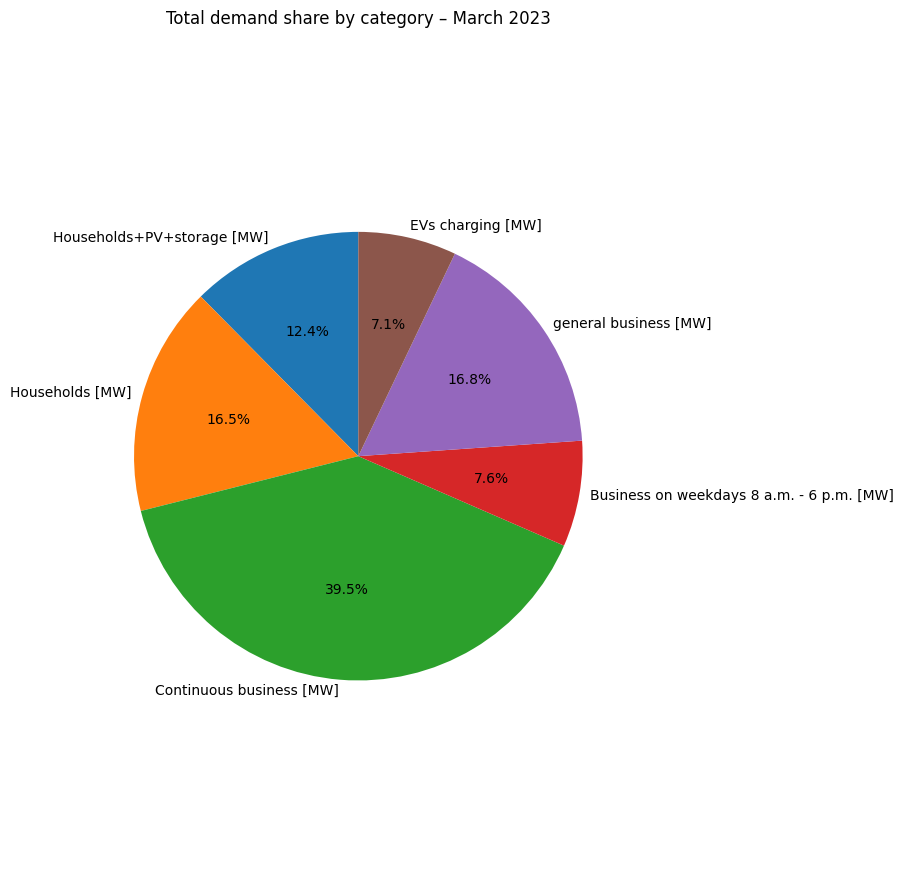

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")

series_map = {
    "Households+PV+storage [MW]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Households [MW]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Continuous business [MW]":   tot_flex_load["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Business on weekdays 8 a.m. - 6 p.m. [MW]": tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots).fillna(0),
    "general business [MW]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots).fillna(0),
    "EVs charging [MW]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots).fillna(0),
}

totals = pd.Series({k: v.sum() for k, v in series_map.items()})

plt.figure(figsize=(9, 9))
plt.pie(
    totals.values,
    labels=totals.index,
    autopct="%1.1f%%",     # percentages only
    startangle=90,
    pctdistance=0.60,      # move % closer to center
    labeldistance=1.05     # move labels slightly out
)
plt.axis("equal")
plt.title("Total demand share by category – March 2023")
plt.tight_layout()
plt.show()


In [30]:
df_rated_biomass = pd.DataFrame(
    0.06,
    index=snapshots,
    columns=["power[MW]"]
)

df_rated_solar = pd.DataFrame(
    solar_gen["power[W]"].values,
    index=snapshots,
    columns=["power[MW]"]
)


# Total demand(after EV reschduling) vs. rated power generations

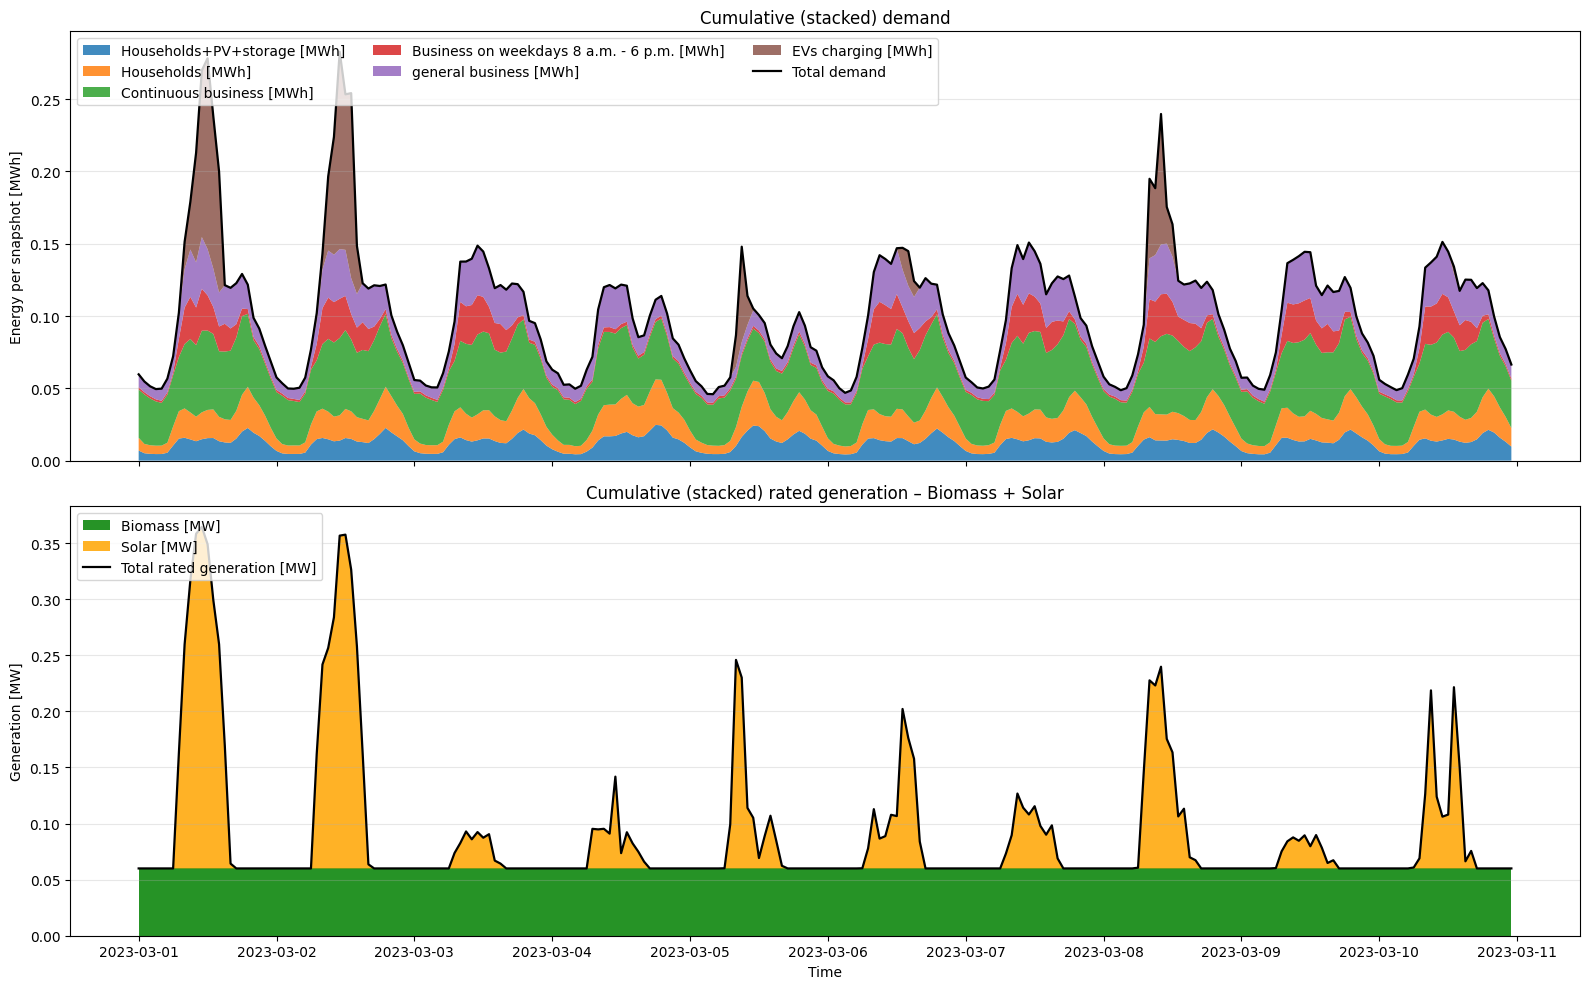

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Time window you can change ----------
start_date = "2023-03-01"
end_date   = "2023-03-10 23:00"

# ---------- Demand breakdown (MWh) ----------
# Build full-month then slice to the window
snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")

df_Tot_demand_full = pd.DataFrame({
    "Households+PV+storage [MWh]":                 tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"],
    "Households [MWh]":                            tot_Houshold["tot_demand_Houshold_variants_[MWh]"],
    "Continuous business [MWh]":                   tot_flex_load["tot_demand_flex_load_variants_[MWh]"],
    "Business on weekdays 8 a.m. - 6 p.m. [MWh]":  tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"],
    "general business [MWh]":                      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"],
    "EVs charging [MWh]":                          Tot_EVs_charging["EVs demand [MWh]"],
}).reindex(snapshots).fillna(0).astype(float)

df_Tot_demand = df_Tot_demand_full.loc[start_date:end_date]
total_demand  = df_Tot_demand.sum(axis=1)

# ---------- Rated generation (MW) ----------
df_rated_gen_full = pd.DataFrame({
    "Biomass [MW]": df_rated_biomass["power[MW]"],
    "Solar [MW]":   df_rated_solar["power[MW]"],
}).astype(float)

df_rated_gen = df_rated_gen_full.loc[start_date:end_date]
total_gen    = df_rated_gen.sum(axis=1)

# ---------- Plot (two subplots, shared x) ----------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Top: Cumulative (stacked) demand (MWh)
ax1.stackplot(
    df_Tot_demand.index,
    *(df_Tot_demand[col].values for col in df_Tot_demand.columns),
    labels=df_Tot_demand.columns,
    alpha=0.85
)
ax1.plot(df_Tot_demand.index, total_demand, linewidth=1.6, color="black", label="Total demand")
ax1.set_title("Cumulative (stacked) demand")
ax1.set_ylabel("Energy per snapshot [MWh]")
ax1.legend(loc="upper left", ncol=3, frameon=True)

# Bottom: Cumulative (stacked) rated generation (MW)
ax2.stackplot(
    df_rated_gen.index,
    df_rated_gen["Biomass [MW]"].values,
    df_rated_gen["Solar [MW]"].values,
    labels=["Biomass [MW]", "Solar [MW]"],
    colors=["green", "orange"],
    alpha=0.85
)
ax2.plot(df_rated_gen.index, total_gen, linewidth=1.6, color="black", label="Total rated generation [MW]")
ax2.set_title("Cumulative (stacked) rated generation – Biomass + Solar")
ax2.set_xlabel("Time")
ax2.set_ylabel("Generation [MW]")
ax2.legend(loc="upper left", frameon=True)

# --- Grid: horizontal only ---
for ax in (ax1, ax2):
    ax.grid(True, axis="y", alpha=0.3)
    ax.grid(False, axis="x")

fig.tight_layout()
plt.show()


# Solar - EV charging and discharging hours - Charging availability

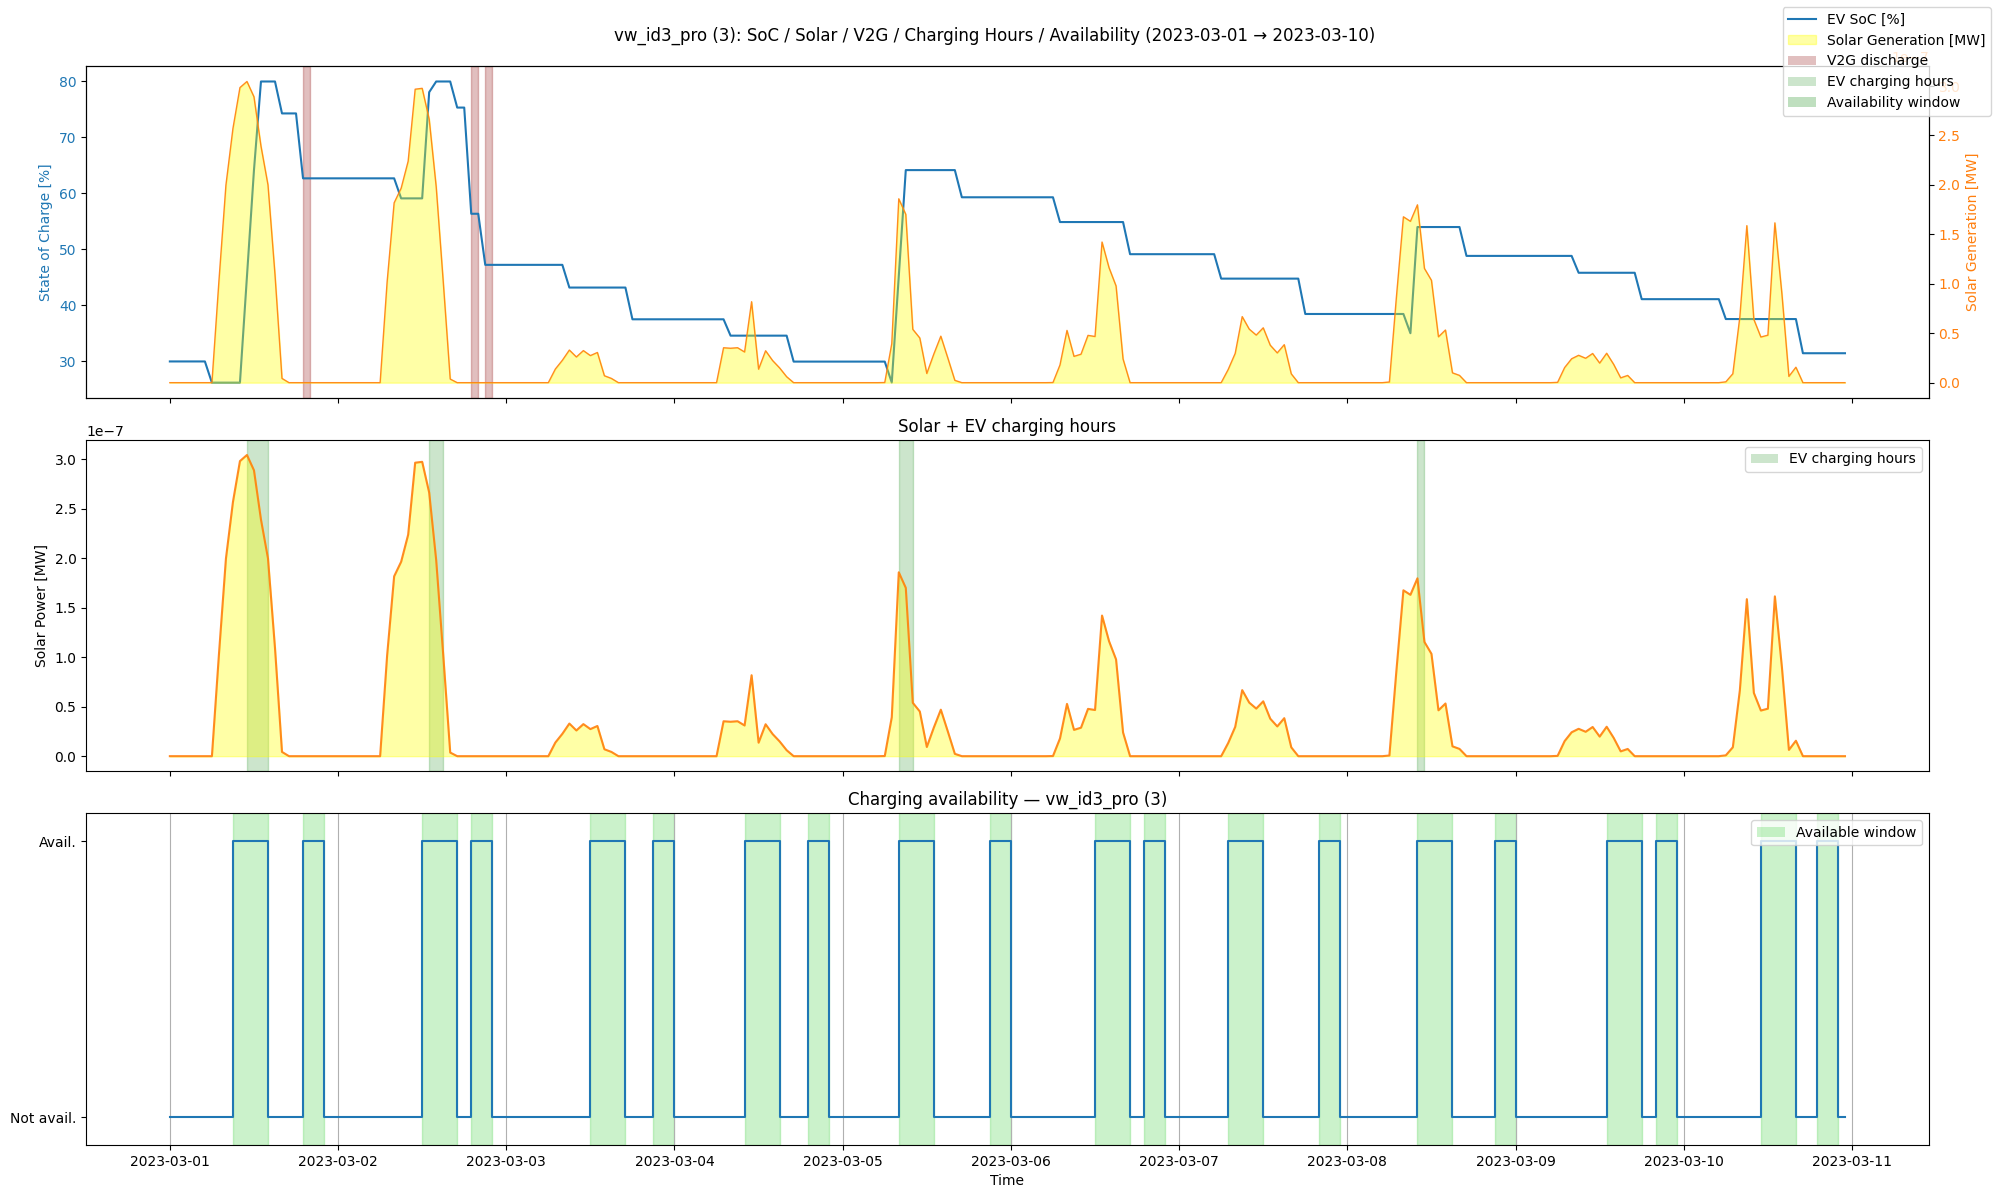

In [32]:
from matplotlib.patches import Patch

ev_name = "vw_id3_pro (3)"   # adjust as needed
ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
store_id = f"{ev_id}_store"

battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
soc_percent = (net.stores_t.e[store_id] / battery_capacity) * 100
solar_power_mw = solar_gen["power[W]"] / 1e6


start = "2023-03-01"
end   = "2023-03-10"

soc_week   = soc_percent.loc[start:end]
solar_week = solar_power_mw.loc[start:end]
avail_week = availability_profiles[ev_name].loc[start:end].astype(int)

# V2G
tol = 1e-6
try:
    discharge = model.solution[f"{ev_id}_p_minus"].to_series()
except KeyError:
    link_v2g = f"{ev_id}_discharge"
    if link_v2g in net.links_t.p0.columns:
        discharge = net.links_t.p0[link_v2g].clip(lower=0)
    elif link_v2g in net.links_t.p1.columns:
        discharge = (-net.links_t.p1[link_v2g]).clip(lower=0)
    else:
        raise KeyError(f"Can't find {ev_id}_p_minus or link {link_v2g} in results.")
discharge_week = discharge.loc[start:end]

# Charging hours 
store_power = net.stores_t.p[store_id]
neg_times_all = store_power.index[store_power < 0]
neg_in_window = neg_times_all[(neg_times_all >= pd.Timestamp(start)) & (neg_times_all <= pd.Timestamp(end))]

def contiguous_spans(times_or_series, step="1H"):
    """Accepts a DatetimeIndex (times) OR a 0/1 Series; returns list of (start, end)."""
    step = pd.Timedelta(step)
    if isinstance(times_or_series, (pd.Series, pd.DataFrame)):
        on = times_or_series[times_or_series == 1]
        if on.empty:
            return []
        times = on.index.sort_values()
    else:
        times = pd.to_datetime(pd.Index(times_or_series)).sort_values()
        if len(times) == 0:
            return []
    starts, ends = [times[0]], []
    for prev, curr in zip(times[:-1], times[1:]):
        if curr - prev > step:
            ends.append(prev + step)
            starts.append(curr)
    ends.append(times[-1] + step)
    return list(zip(starts, ends))

charge_spans = contiguous_spans(neg_in_window, step="1h")    
avail_spans  = contiguous_spans(avail_week,  step="1h")      

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 12), sharex=True)


line_soc, = ax1.plot(soc_week.index, soc_week, label="EV SoC [%]", color="tab:blue")
ax1.set_ylabel("State of Charge [%]", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(False)

ax1b = ax1.twinx()
ax1b.plot(solar_week.index, solar_week, color="tab:orange", alpha=0.9, linewidth=1, label="_nolegend_")
solar_fill = ax1b.fill_between(solar_week.index, solar_week, 0, color="yellow", alpha=0.35,
                               label="Solar Generation [MW]", zorder=1)
ax1b.set_ylabel("Solar Generation [MW]", color="tab:orange")
ax1b.tick_params(axis="y", labelcolor="tab:orange")


mask = discharge_week > tol
if mask.any():
    edges = mask.astype(int).diff().fillna(0)
    starts = list(discharge_week.index[edges == 1])
    ends   = list(discharge_week.index[edges == -1])
    if mask.iloc[0]:
        starts = [discharge_week.index[0]] + starts
    if mask.iloc[-1]:
        ends = ends + [discharge_week.index[-1]]
    for sps, eps in zip(starts, ends):
        ax1.axvspan(sps, eps, color="darkred", alpha=0.25, zorder=0)
    discharge_patch = Patch(facecolor="darkred", alpha=0.25, label="V2G discharge")
else:
    discharge_patch = None

#Middle: Solar with charging hours
ax2.plot(solar_week.index, solar_week, color="tab:orange", label="Solar Power [MW]", alpha=0.9)
ax2.fill_between(solar_week.index, solar_week, 0, color="yellow", alpha=0.35, zorder=1)

for sps, eps in charge_spans:
    ax2.axvspan(sps, eps, color="green", alpha=0.2, zorder=0)

charge_patch = Patch(facecolor="green", alpha=0.2, label="EV charging hours")

ax2.set_ylabel("Solar Power [MW]")
ax2.set_title("Solar + EV charging hours")
ax2.grid(False)
ax2.legend(handles=[charge_patch], loc="upper right", frameon=True)

#Bottom: Availability 
ax3.step(avail_week.index, avail_week, where="post", linewidth=1.5, label="Availability (0/1)")
for sps, eps in avail_spans:
    ax3.axvspan(sps, eps, color="limegreen", alpha=0.25, zorder=0)
ax3.set_ylim(-0.1, 1.1)
ax3.set_yticks([0, 1]); ax3.set_yticklabels(["Not avail.", "Avail."])
ax3.set_xlabel("Time")
ax3.set_title(f"Charging availability — {ev_name}")
ax3.grid(True, axis="x")
ax3.legend(handles=[Patch(facecolor="limegreen", alpha=0.25, label="Available window")],
           loc="upper right", frameon=True)


fig.suptitle(f"{ev_name}: SoC / Solar / V2G / Charging Hours / Availability ({start} → {end})")

handles1, labels1 = ax1.get_legend_handles_labels()
handles1b, labels1b = ax1b.get_legend_handles_labels()
handles = handles1 + handles1b
labels  = labels1 + labels1b
if discharge_patch is not None:
    handles.append(discharge_patch)
    labels.append("V2G discharge")
handles.append(Patch(facecolor="green", alpha=0.2)); labels.append("EV charging hours")
handles.append(Patch(facecolor="green", alpha=0.25)); labels.append("Availability window")

fig.legend(handles, labels, loc="upper right", frameon=True)

fig.tight_layout()
plt.show()


# Cumulative Supply vs. Total Demand

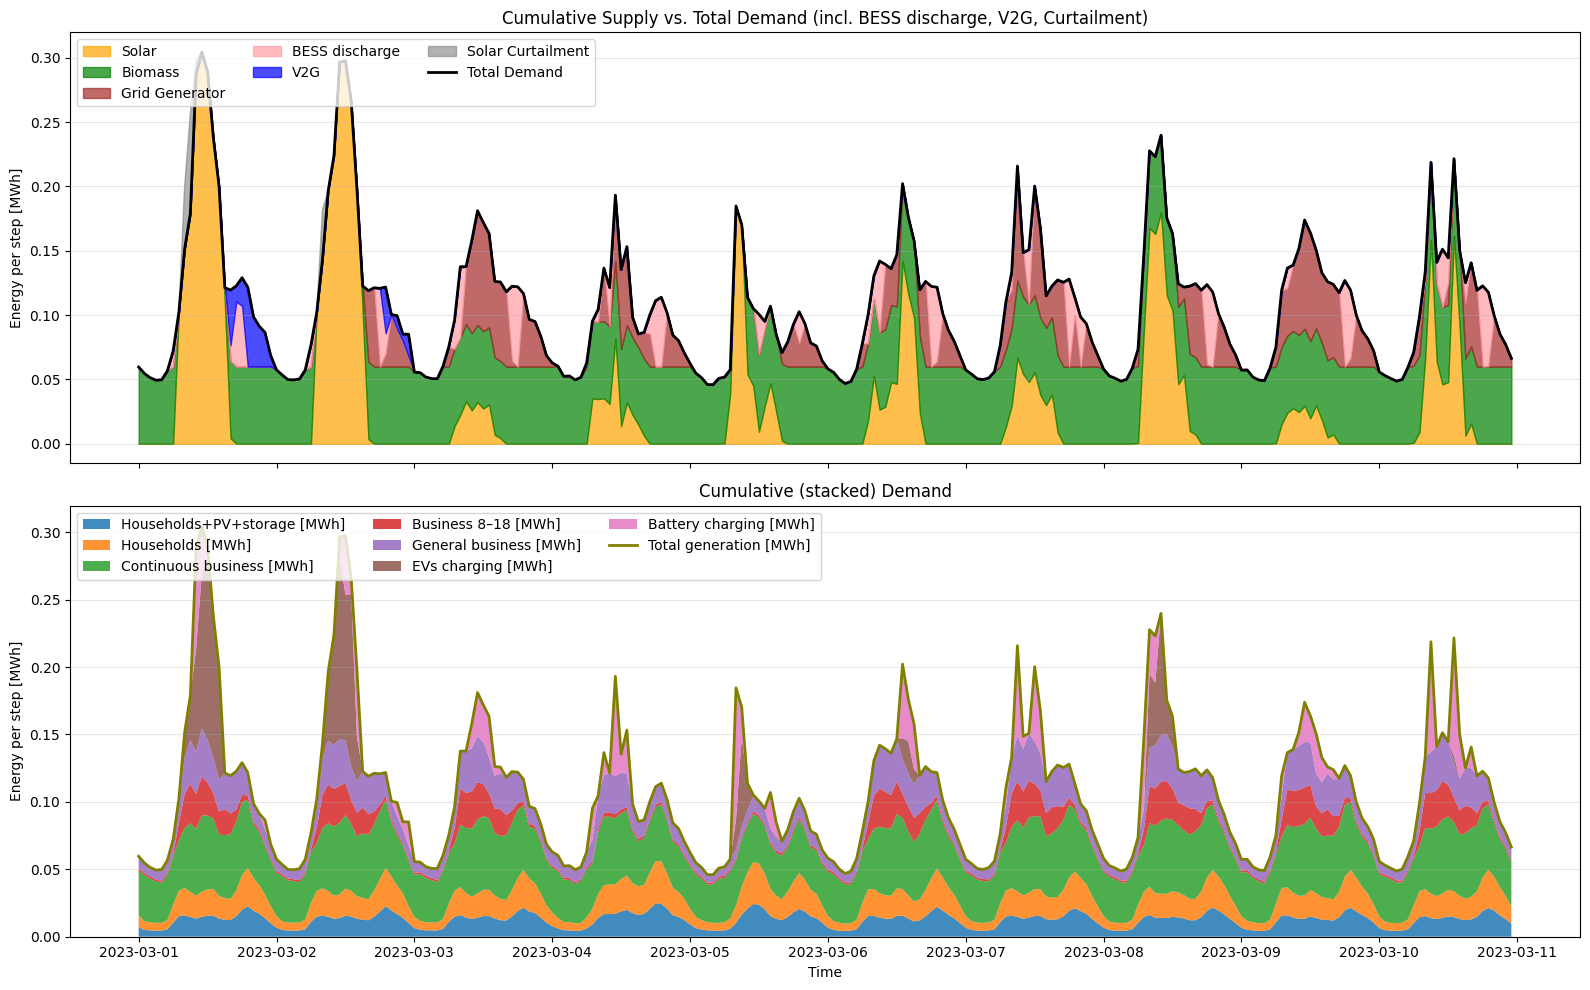

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# -------- Time window you can change --------
start_date = "2023-03-01"
end_date   = "2023-03-10 23:00"
snapshots  = pd.date_range(start_date, end_date, freq="h")

# -------- Supply side (per-step energy ~ MWh for 1h steps) --------
solar   = net.generators_t.p["solar"].reindex(snapshots).fillna(0).astype(float)
biomass = net.generators_t.p["Biomass"].reindex(snapshots).fillna(0).astype(float)
grid    = net.generators_t.p["grid_generator"].reindex(snapshots).fillna(0).astype(float)
EVs_discharge = Tot_EVs_discharging["EVs discharging [MW]"].reindex(snapshots).fillna(0).astype(float)

# BESS power (+ discharge to bus; – charge from bus)
store_p        = net.stores_t.p["battery_storage"].reindex(snapshots).fillna(0).astype(float)
bess_discharge = store_p.clip(lower=0)          # supply layer (to grid/load)
batt_charging  = (-store_p).clip(lower=0)       # demand category

# Optional: Rated Solar (for curtailment shading)
# Try common sources: df_rated_solar["power[MW]"] or solar_gen
if 'df_rated_solar' in globals():
    rated_solar = df_rated_solar["power[MW]"].reindex(snapshots).fillna(0).astype(float)
elif 'solar_gen' in globals():
    rated_solar = (solar_gen.reindex(snapshots) if hasattr(solar_gen, "reindex") else pd.Series(solar_gen, index=snapshots))\
                  .fillna(0).astype(float)
else:
    # Fallback: no rated series available -> use dispatched solar (no curtailment will appear)
    rated_solar = solar.copy()

# -------- Demand breakdown (MWh per step) --------
df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots),
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots),
    "Continuous business [MWh]":   tot_flex_load["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    "Business 8–18 [MWh]":         tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots),
    "General business [MWh]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots),
    "EVs charging [MWh]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots),
    "Battery charging [MWh]":      batt_charging,
}).fillna(0).astype(float)

total_demand      = df_Tot_demand.sum(axis=1)
total_generation  = (solar + biomass + grid + bess_discharge + EVs_discharge).astype(float)

# -------- Colors for supply stack --------
# Solar=orange, Biomass=green, Grid=brown, V2G=blue, BESS discharge=pink
col_solar = "orange"
col_biom  = "green"
col_grid  = "#A52A2A"
col_v2g   = "blue"
col_bessd = "#FF9DA6"  # pink
col_curt  = "grey"

# -------- Build cumulative layers for top stack --------
solar_cum     = solar
biomass_cum   = solar_cum + biomass
grid_cum      = biomass_cum + grid
bessd_cum     = grid_cum + bess_discharge
v2g_cum       = bessd_cum + EVs_discharge

# Curtailment mask (Rated Solar above demand)
mask_curt = rated_solar > total_demand

# -------- Plot (two subplots, shared x) --------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# === Top: Cumulative supply vs Total demand (+ BESS discharge, V2G, Curtailment) ===
ax1.fill_between(snapshots, 0,            solar_cum,   label="Solar",          alpha=0.7, color=col_solar)
ax1.fill_between(snapshots, solar_cum,    biomass_cum, label="Biomass",        alpha=0.7, color=col_biom)
ax1.fill_between(snapshots, biomass_cum,  grid_cum,    label="Grid Generator", alpha=0.7, color=col_grid)
ax1.fill_between(snapshots, grid_cum,     bessd_cum,   label="BESS discharge", alpha=0.7, color=col_bessd)
ax1.fill_between(snapshots, bessd_cum,    v2g_cum,     label="V2G",            alpha=0.7, color=col_v2g)

# Curtailment area (between Total Demand and Rated Solar where rated > demand)
ax1.fill_between(snapshots, total_demand, rated_solar, where=mask_curt, interpolate=True,
                 label="Solar Curtailment", alpha=0.6, color=col_curt)

# Demand + Rated Solar lines
ax1.plot(snapshots, total_demand,  label="Total Demand", color="black", linewidth=2)
#ax1.plot(snapshots, rated_solar,   label="Rated Solar",  color="red",   linewidth=0.1)

ax1.set_title("Cumulative Supply vs. Total Demand (incl. BESS discharge, V2G, Curtailment)")
ax1.set_ylabel("Energy per step [MWh]")
ax1.legend(loc="upper left", ncol=3, frameon=True)

# === Bottom: Demand breakdown (incl. Battery charging) + Total Generation ===
ax2.stackplot(
    df_Tot_demand.index,
    *[df_Tot_demand[c].values for c in df_Tot_demand.columns],
    labels=df_Tot_demand.columns,
    alpha=0.85
)
ax2.plot(snapshots, total_generation, linewidth=2, color="olive", label="Total generation [MWh]")

ax2.set_title("Cumulative (stacked) Demand")
ax2.set_xlabel("Time")
ax2.set_ylabel("Energy per step [MWh]")
ax2.legend(loc="upper left", ncol=3, frameon=True)

# --- Grid: horizontal only ---
for ax in (ax1, ax2):
    ax.grid(True, axis="y", alpha=0.3)
    ax.grid(False, axis="x")

fig.tight_layout()
plt.show()


# State of Charge (SOC) of BESS [%]

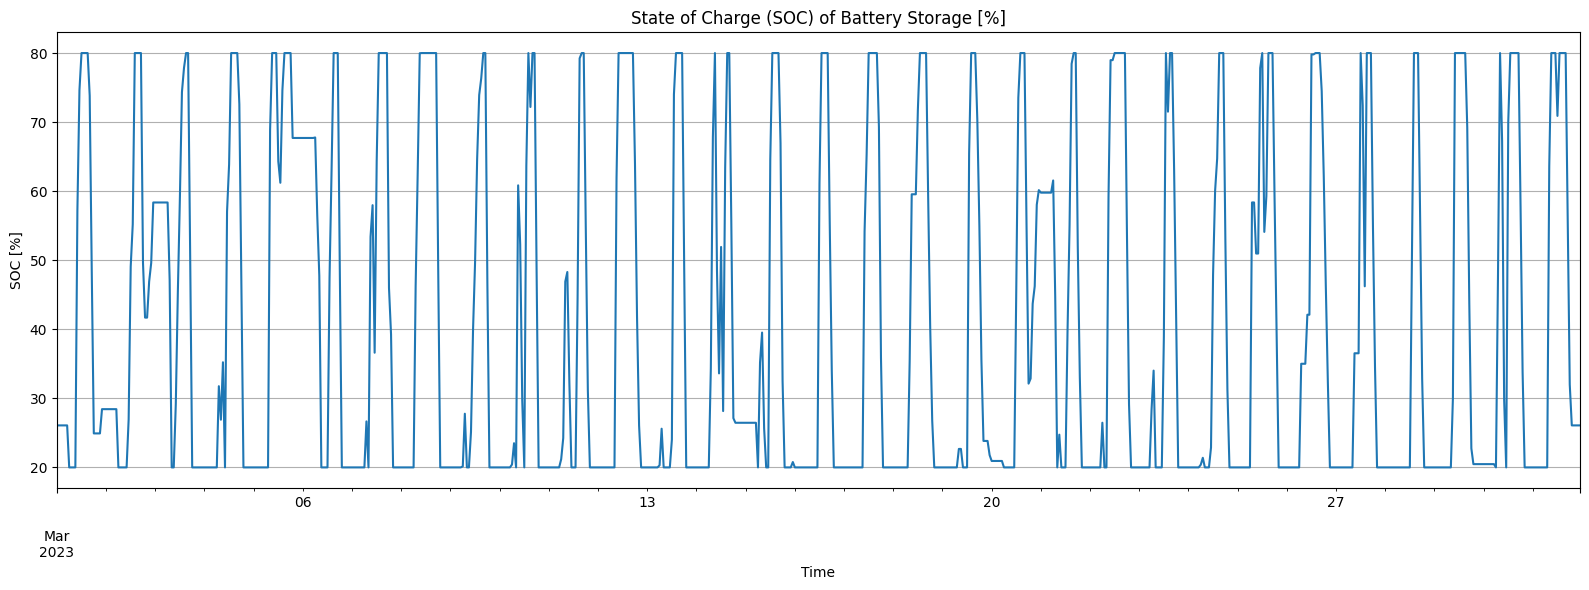

In [34]:
battery_capacity_mwh = net.stores.loc["battery_storage", "e_nom"]

# SOC in percentage
soc_percent = net.stores_t.e["battery_storage"] / battery_capacity_mwh * 100

# Plot
plt.figure(figsize=(16, 6))
soc_percent.plot()
plt.title("State of Charge (SOC) of Battery Storage [%]")
plt.ylabel("SOC [%]")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# Curtailed solar

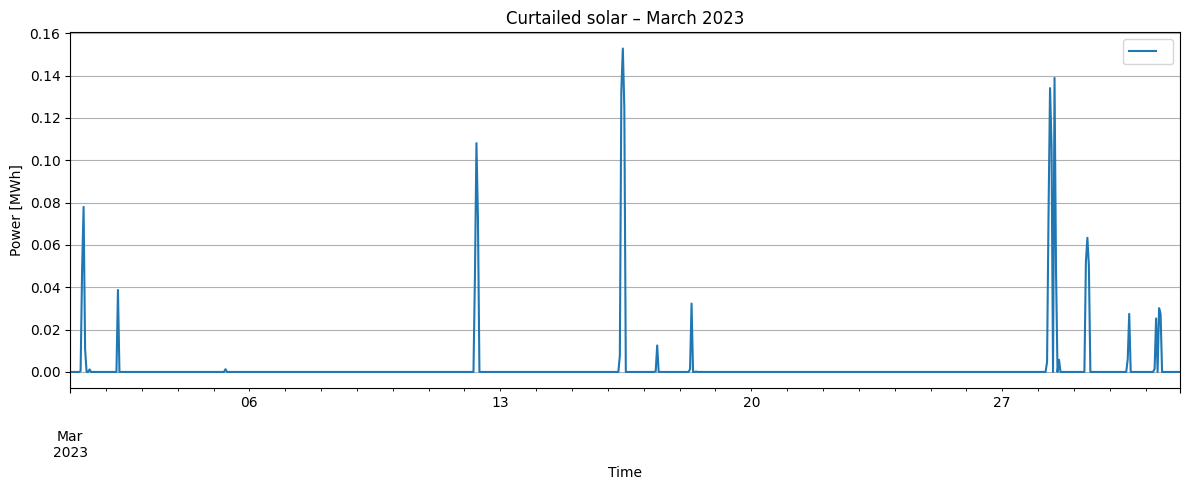

In [35]:
start1= "2023-03-01 00:00:00"
end1 =  "2023-03-31 23:00:00"
solar_Curtailment=(solar_gen["power[W]"]-net.generators_t.p["solar"])

plt.figure(figsize=(12, 5))
solar_Curtailment.loc[start1:end1].plot(legend=True)
plt.title("Curtailed solar – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

# Total curtailed solar

In [36]:
solar_Curtailment.sum()

np.float64(1.66647376722026)

# Grid import plot

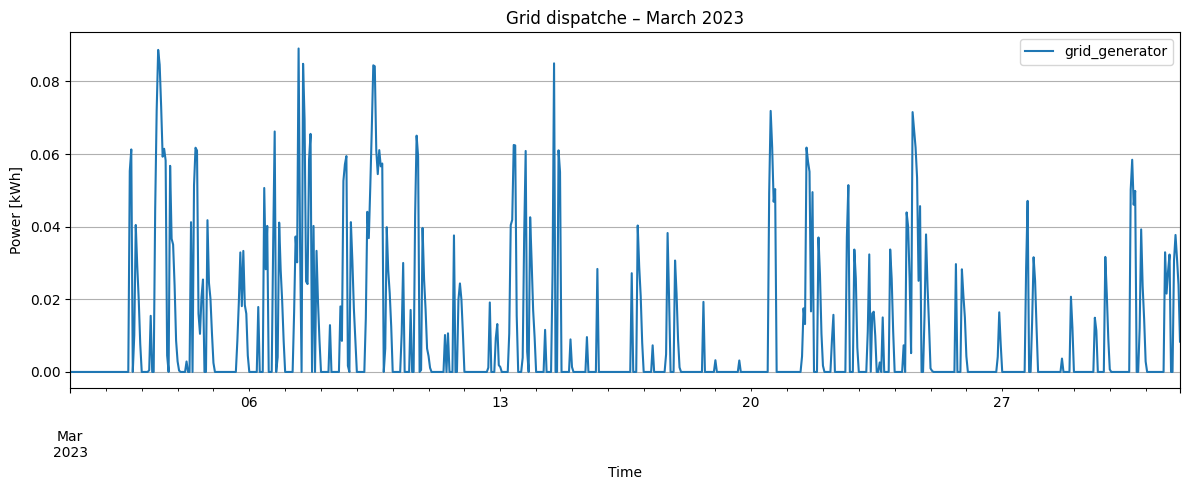

In [37]:
plt.figure(figsize=(12, 5))
net.generators_t.p["grid_generator"].plot(legend=True)
plt.title("Grid dispatche – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

# Total generation mix

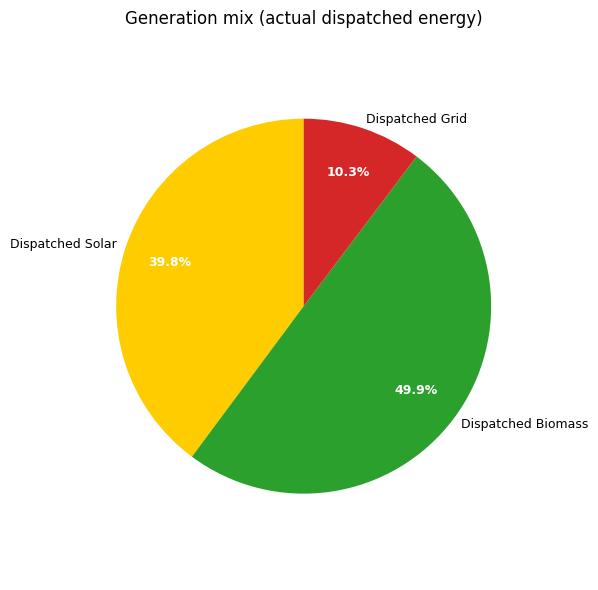

In [38]:
import matplotlib.pyplot as plt

# --- Supply breakdown (totals over the window; 1-hour steps ≈ MWh) ---
right_solar   = net.generators_t.p["solar"].sum()
right_biomass = net.generators_t.p["Biomass"].sum()
right_grid    = net.generators_t.p["grid_generator"].sum()

right_labels = ["Dispatched Solar", "Dispatched Biomass", "Dispatched Grid"]
right_sizes  = [right_solar, right_biomass, right_grid]
right_colors = ["#ffcc00", "#2ca02c", "#d62728"]  # yellow, green, red

# drop zero slices to avoid clutter
labels, sizes, colors = zip(*[(L,S,C) for L,S,C in zip(right_labels, right_sizes, right_colors) if S > 0])

# --- Plot single pie ---
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors,
    autopct="%1.1f%%", startangle=90, pctdistance=0.75, labeldistance=1.05
)
ax.axis("equal")
ax.set_title("Generation mix (actual dispatched energy)")

# styling
for t in autotexts:
    t.set_color("white"); t.set_fontweight("bold"); t.set_fontsize(9)
for t in texts:
    t.set_fontsize(9)

plt.tight_layout()
plt.show()


# Grid import plot

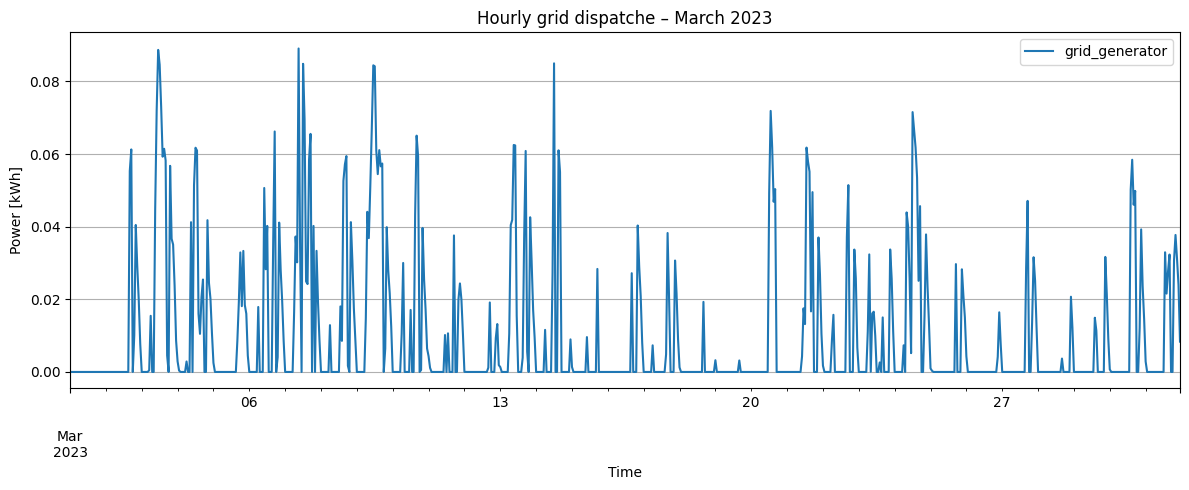

Timestamp('2023-03-07 09:00:00')

In [39]:
plt.figure(figsize=(12, 5))
net.generators_t.p["grid_generator"].loc[start1:end1].plot(legend=True)
plt.title("Hourly grid dispatche – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
net.generators_t.p["grid_generator"].idxmax()

<Axes: title={'center': 'total Flex Load'}, xlabel='snapshot'>

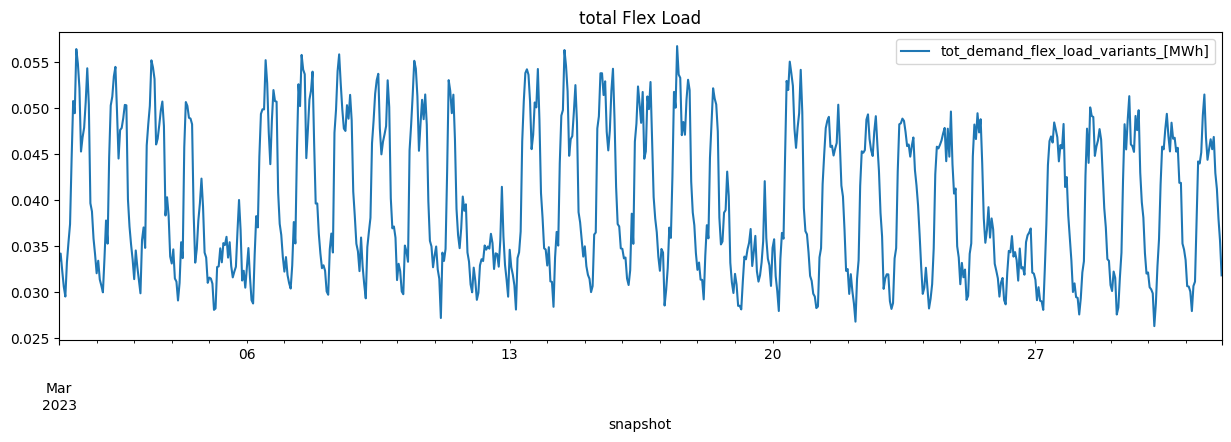

In [40]:
tot_flex_load.loc[start1:end1].plot(figsize=(15, 4), title="total Flex Load")

# Total hourly grid import

<Axes: title={'center': 'total hourly grid import[MW]'}, xlabel='snapshot'>

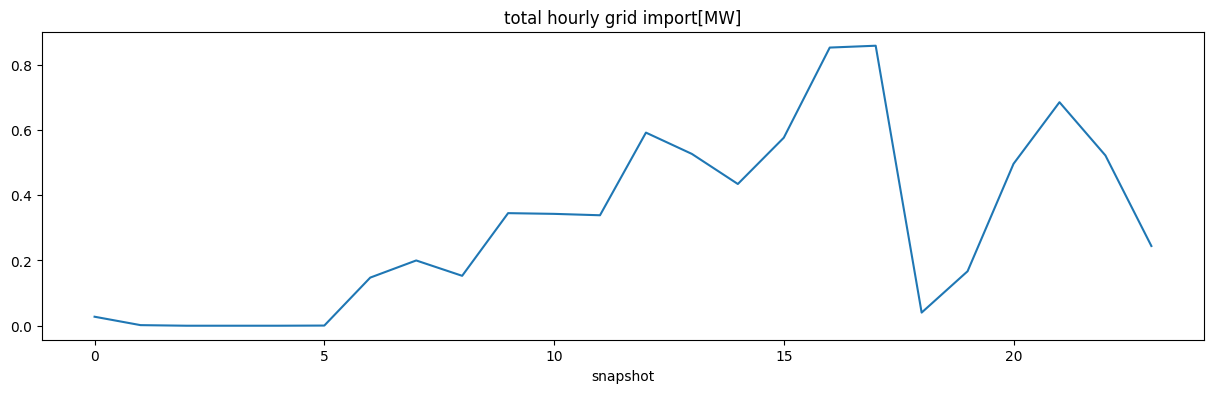

In [41]:
tot_hourly_grid_import= net.generators_t.p["grid_generator"].groupby(net.generators_t.p["grid_generator"].index.hour).sum()
tot_hourly_grid_import.plot(figsize=(15, 4), title="total hourly grid import[MW]")

# Locational Marginal Prices at each buses

In [42]:
net.buses_t.marginal_price

,Biomass,Landswirtschaftsbetriebe,battery_bus,benz_eqe_300_1_bus,benz_eqe_300_2_bus,benz_eqe_300_3_bus,benz_eqe_300_4_bus,bmw_i4_m50_1_bus,bmw_i4_m50_2_bus,bmw_i4_m50_3_bus,...,tesla_model_3_4_bus,vw_id3_pro_1_bus,vw_id3_pro_2_bus,vw_id3_pro_3_bus,vw_id3_pro_4_bus,vw_id7_1_bus,vw_id7_2_bus,vw_id7_3_bus,vw_id7_4_bus,solar_bus
snapshot,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,104.80,204.80,225.95,163.267145,163.267145,163.267145,163.307145,0.0,163.267145,163.267145,...,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,225.94
2023-03-01 01:00:00,104.80,204.80,225.95,163.267145,163.267145,163.267145,163.307145,0.0,163.267145,163.267145,...,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,225.94
2023-03-01 02:00:00,104.80,204.80,225.95,163.267145,163.267145,163.267145,163.307145,0.0,163.267145,163.267145,...,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,225.94
2023-03-01 03:00:00,104.80,204.80,225.95,163.267145,163.267145,163.267145,163.307145,0.0,163.267145,163.267145,...,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,225.94
2023-03-01 04:00:00,104.80,204.80,225.95,163.267145,163.267145,163.267145,163.307145,0.0,163.267145,163.267145,...,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,225.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,225.98,325.98,225.95,163.267145,163.267145,163.267145,163.267145,0.0,163.267145,163.267145,...,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,225.98
2023-03-31 20:00:00,214.83,314.83,225.95,163.267145,163.267145,163.267145,163.267145,0.0,163.267145,163.267145,...,163.267145,163.267145,163.267145,163.267145,163.267145,163.267145,158.497145,163.267145,163.267145,225.94
2023-03-31 21:00:00,202.73,302.73,225.95,163.267145,163.267145,163.267145,0.000000,0.0,163.267145,158.497145,...,163.267145,158.497145,163.267145,163.267145,158.497145,158.497145,158.497145,163.267145,158.497145,225.94


# Locational Marginal Prices at each buses (selected time and Bus)

In [43]:
start = "2023-03-01 12:00:00"
end = "2023-03-01 23:00:00"
df_LMP = net.buses_t.marginal_price.loc[start:end, ['grid', 'solar_bus', 'Biomass','flex_load', 'houshold','benz_eqe_300_1_bus']]
df_LMP

,grid,solar_bus,Biomass,flex_load,houshold,benz_eqe_300_1_bus
snapshot,,,,,,
2023-03-01 12:00:00,115.79,104.50,104.80,204.50,204.50,163.267145
2023-03-01 13:00:00,114.12,104.50,104.80,204.50,204.50,163.267145
2023-03-01 14:00:00,116.09,104.50,104.80,204.50,204.50,163.267145
2023-03-01 15:00:00,122.81,104.80,104.80,204.80,204.80,163.267145
2023-03-01 16:00:00,135.46,230.75,230.75,330.75,330.75,163.267145
2023-03-01 17:00:00,162.74,230.75,230.75,330.75,330.75,163.267145
2023-03-01 18:00:00,183.69,230.75,230.75,330.75,330.75,163.267145
2023-03-01 19:00:00,182.48,230.71,230.71,330.71,330.71,163.267145
2023-03-01 20:00:00,162.74,230.71,230.71,330.71,330.71,163.267145


# Optimal Power Flows from the generators to the loads [MW]

In [44]:
idx = net.snapshots[(net.snapshots >= start) & (net.snapshots <= end)]

df_opf = pd.DataFrame(index=idx)
df_opf.index.name = "snapshot"

df_opf["Rated solar power [MW]"]      = (solar_gen["power[W]"].reindex(idx))
df_opf["Solar dispatched"]   = net.generators_t.p["solar"].reindex(idx)
df_opf["Biomass dispatched"]          = net.generators_t.p["Biomass"].reindex(idx)
df_opf["Grid generator"]   = net.generators_t.p["grid_generator"].reindex(idx)
#df_opf["Battery power [MW]"]    = net.stores_t.p["battery_storage"].reindex(idx)   # (+ discharging to loads)
df_opf["Total EVs discharging"]    = Tot_EVs_discharging.reindex(idx)
df_opf["Total demand"]    = Tot_demand.reindex(idx)

#df_opf["Battery SoC [MWh]"]     = net.stores_t.e["battery_storage"].reindex(idx)

display(df_opf)

,Rated solar power [MW],Solar dispatched,Biomass dispatched,Grid generator,Total EVs discharging,Total demand
snapshot,,,,,,
2023-03-01 12:00:00,0.289068,0.289068,0.00000,0.0,0.000000,0.278302
2023-03-01 13:00:00,0.239216,0.238030,0.00000,0.0,0.000000,0.238030
2023-03-01 14:00:00,0.199972,0.199972,0.00000,0.0,0.000000,0.199972
2023-03-01 15:00:00,0.109328,0.109328,0.01204,0.0,0.000000,0.121368
2023-03-01 16:00:00,0.004300,0.004300,0.06000,0.0,0.042861,0.119516
2023-03-01 17:00:00,0.000000,0.000000,0.06000,0.0,0.012065,0.122745
2023-03-01 18:00:00,0.000000,0.000000,0.06000,0.0,0.022000,0.129120
2023-03-01 19:00:00,0.000000,0.000000,0.06000,0.0,0.061725,0.121725
2023-03-01 20:00:00,0.000000,0.000000,0.06000,0.0,0.038749,0.098749


# Total charging cost of an EV

In [45]:

ev_name = "vw_id7 (1)"   
ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")

link_variants = [
    f"{ev_id}_charge",
    f"{ev_id}_Charge",
    f"{ev_id}_CHarge",
]

price = net.buses_t.marginal_price[f"{ev_id}_bus"]

charge_power = 0
for link in link_variants:
    if link in net.links_t.p0.columns:
        charge_power += net.links_t.p0[link]

charging_cost = (price * charge_power).sum()   
total_energy = driving_profiles[ev_name].sum() 

print(f" Results for {ev_name}")
print(f"• Total charging energy in March: {charge_power.sum():.2f} MW")
print(f"•          Total charging cost:   {charging_cost:.2f} €")



 Results for vw_id7 (1)
• Total charging energy in March: 0.24 MW
•          Total charging cost:   40.56 €


# Revenue Solar

In [46]:
revenue_solar = net.buses_t.marginal_price["solar_bus"]*net.generators_t.p["solar"]
revenue_solar.sum()

np.float64(3765.7633002854827)

# Cost of Flex Load

In [47]:
revenue_load = net.buses_t.marginal_price["flex_load"]*tot_flex_load["tot_demand_flex_load_variants_[MWh]"]
revenue_load.sum()

np.float64(8130.017743749725)

# Cost of a fixed Load

In [48]:
Revenue_load = net.buses_t.marginal_price["houshold"]*tot_Houshold["tot_demand_Houshold_variants_[MWh]"]
Revenue_load.sum()

np.float64(3505.363603756417)

# Total system cost

In [49]:
total_cost = float(net.objective)
print(total_cost)

15932.759508574638


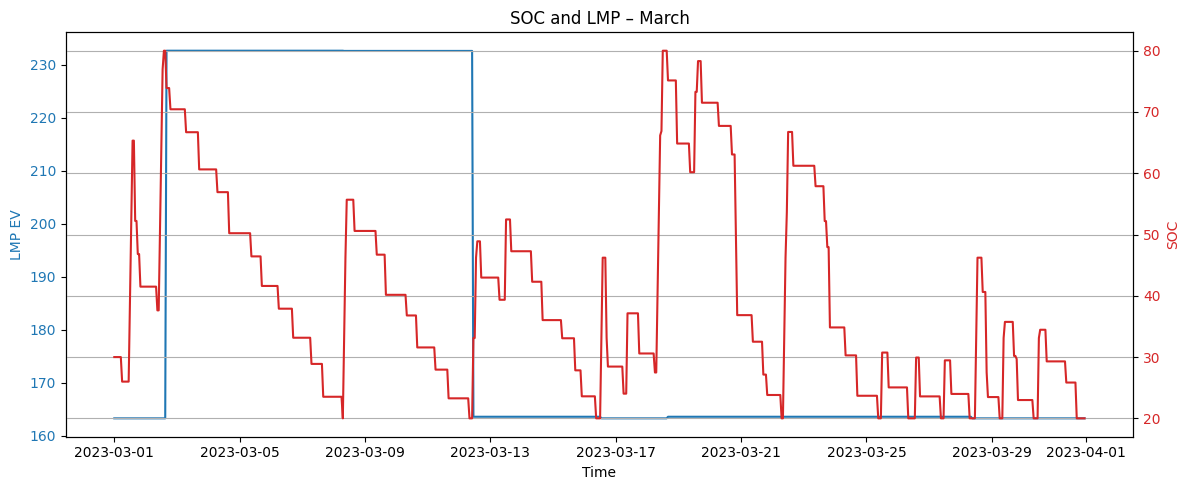

In [50]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 5))
start = "2023-03-01"
end = "2023-03-31"

# Left Y-axis: LMP Solar
ax1.plot(net.buses_t.marginal_price["bmw_i4_m50_2_bus"].loc[start:end], color='tab:blue', label="LMP Solar")
ax1.set_xlabel("Time")
ax1.set_ylabel("LMP EV", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ev_name = "bmw_i4_m50 (2)"
ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
store_id = f"{ev_id}_store"

battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
soc_percent = (net.stores_t.e[store_id] / battery_capacity) * 100
ax2 = ax1.twinx()
ax2.plot(soc_percent.loc[start:end], color='tab:red', label="Grid Dispatch")
ax2.set_ylabel("SOC", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title("SOC and LMP – March")
fig.tight_layout()
plt.grid(True)
plt.show()

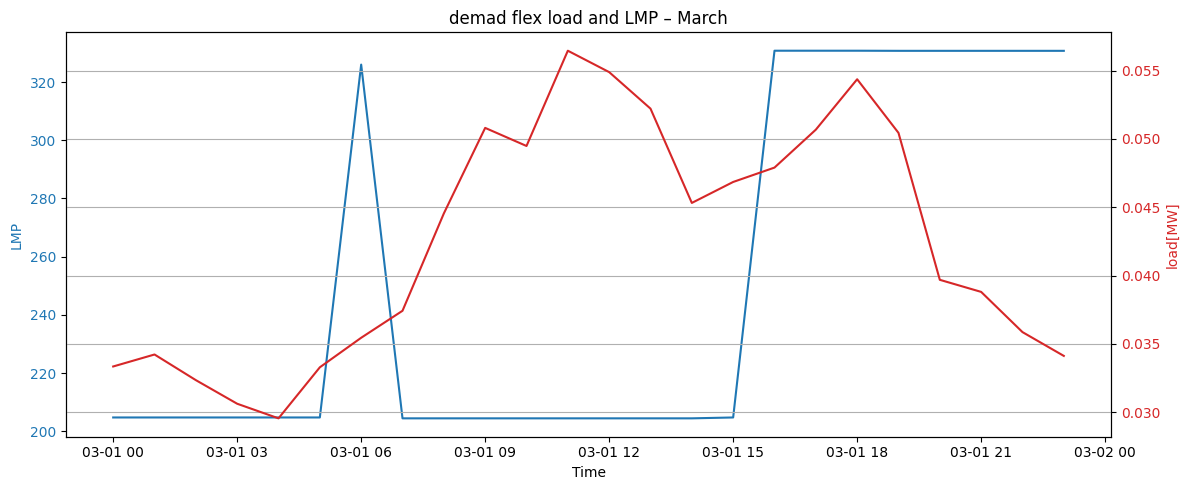

In [51]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 5))
start = "2023-03-01"
end = "2023-03-01"

# Left Y-axis: LMP Solar
ax1.plot(net.buses_t.marginal_price["flex_load"].loc[start:end], color='tab:blue', label="LMP Solar")
ax1.set_xlabel("Time")
ax1.set_ylabel("LMP", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2 = ax1.twinx()
ax2.plot(tot_flex_load["tot_demand_flex_load_variants_[MWh]"].loc[start:end], color='tab:red', label="Grid Dispatch")
ax2.set_ylabel("load[MW]", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title("demad flex load and LMP – March")
fig.tight_layout()
plt.grid(True)
plt.show()